In [2]:
import pandas as pd
import os

In [3]:
DIR = '/mnt/f/Data/MLOPS_2023/test_phase2_prob2/'
files = os.listdir(DIR)

In [4]:
train_df = pd.read_parquet("/mnt/f/Data/MLOPS_2023/data_phase-2/phase-2/prob-2/raw_train.parquet")


In [5]:
dfs = []
for file in files:
    df = pd.read_csv(DIR+file)
    dfs.append(df)

In [9]:
for i, df in enumerate(dfs):
    print(i)
    print(df['feature27'].value_counts())

0
0.0       588
45.0      107
44.0       74
89.0       30
82.0       21
         ... 
1263.0      1
47.0        1
886.0       1
718.0       1
236.0       1
Name: feature27, Length: 166, dtype: int64
1
0.0       481
45.0       76
44.0       55
89.0       26
91.0       20
         ... 
417.0       1
899.0       1
114.0       1
1032.0      1
522.0       1
Name: feature27, Length: 157, dtype: int64
2
0.0       564
44.0       86
45.0       83
89.0       35
82.0       28
         ... 
1333.0      1
376.0       1
852.0       1
124.0       1
641.0       1
Name: feature27, Length: 146, dtype: int64
3
0.0       483
45.0       76
44.0       61
89.0       31
565.0      19
         ... 
117.0       1
647.0       1
938.0       1
937.0       1
1085.0      1
Name: feature27, Length: 147, dtype: int64
4
0.0       456
45.0       80
44.0       61
89.0       25
91.0       23
         ... 
1254.0      1
292.0       1
74.0        1
361.0       1
866.0       1
Name: feature27, Length: 160, dtype: int64
5
0.0

In [17]:
check_drift = {}
for col in ['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6',
            'feature7', 'feature8', 'feature9', 'feature10', 'feature11',
            'feature12', 'feature13', 'feature14', 'feature15', 'feature16',
            'feature17', 'feature18', 'feature19', 'feature20', 'feature21',
            'feature22', 'feature23', 'feature24', 'feature25', 'feature26',
            'feature27', 'feature28', 'feature29', 'feature30', 'feature31',
            'feature32', 'feature33', 'feature34', 'feature35', 'feature36',
            'feature37', 'feature38', 'feature39', 'feature40', 'feature41']:
    if col not in ["feature2",
                   "feature3",
                   "feature4"]:
        print(col)
        mean_ = []
        std_ = []
        max_ = []
        min_ = []
        n_maxs = []
        n_mins = []
        train_max = train_df[col].max()
        train_min = train_df[col].min()
        for df in dfs:
            mean_.append(df[col].mean())
            std_.append(df[col].std())
            max_.append(df[col].max())
            min_.append(df[col].min())
            n_maxs.append(df[df[col]>train_max].shape[0])
            n_mins.append(df[df[col]<train_min].shape[0])
        check_drift[col] = pd.DataFrame({'mean_':mean_, 'std_':std_, 'max_': max_, 'min_':min_, 'n_max':n_maxs, 'n_min':n_mins})

feature1
feature5
feature6
feature7
feature8
feature9
feature10
feature11
feature12
feature13
feature14
feature15
feature16
feature17
feature18
feature19
feature20
feature21
feature22
feature23
feature24
feature25
feature26
feature27
feature28
feature29
feature30
feature31
feature32
feature33
feature34
feature35
feature36
feature37
feature38
feature39
feature40
feature41


In [11]:
check_drift.keys()

dict_keys(['feature1', 'feature5', 'feature6', 'feature7', 'feature8', 'feature9', 'feature10', 'feature11', 'feature12', 'feature13', 'feature14', 'feature15', 'feature16', 'feature17', 'feature18', 'feature19', 'feature20', 'feature21', 'feature22', 'feature23', 'feature24', 'feature25', 'feature26', 'feature27', 'feature28', 'feature29', 'feature30', 'feature31', 'feature32', 'feature33', 'feature34', 'feature35', 'feature36', 'feature37', 'feature38', 'feature39', 'feature40', 'feature41'])

In [12]:
import matplotlib.pyplot as plt

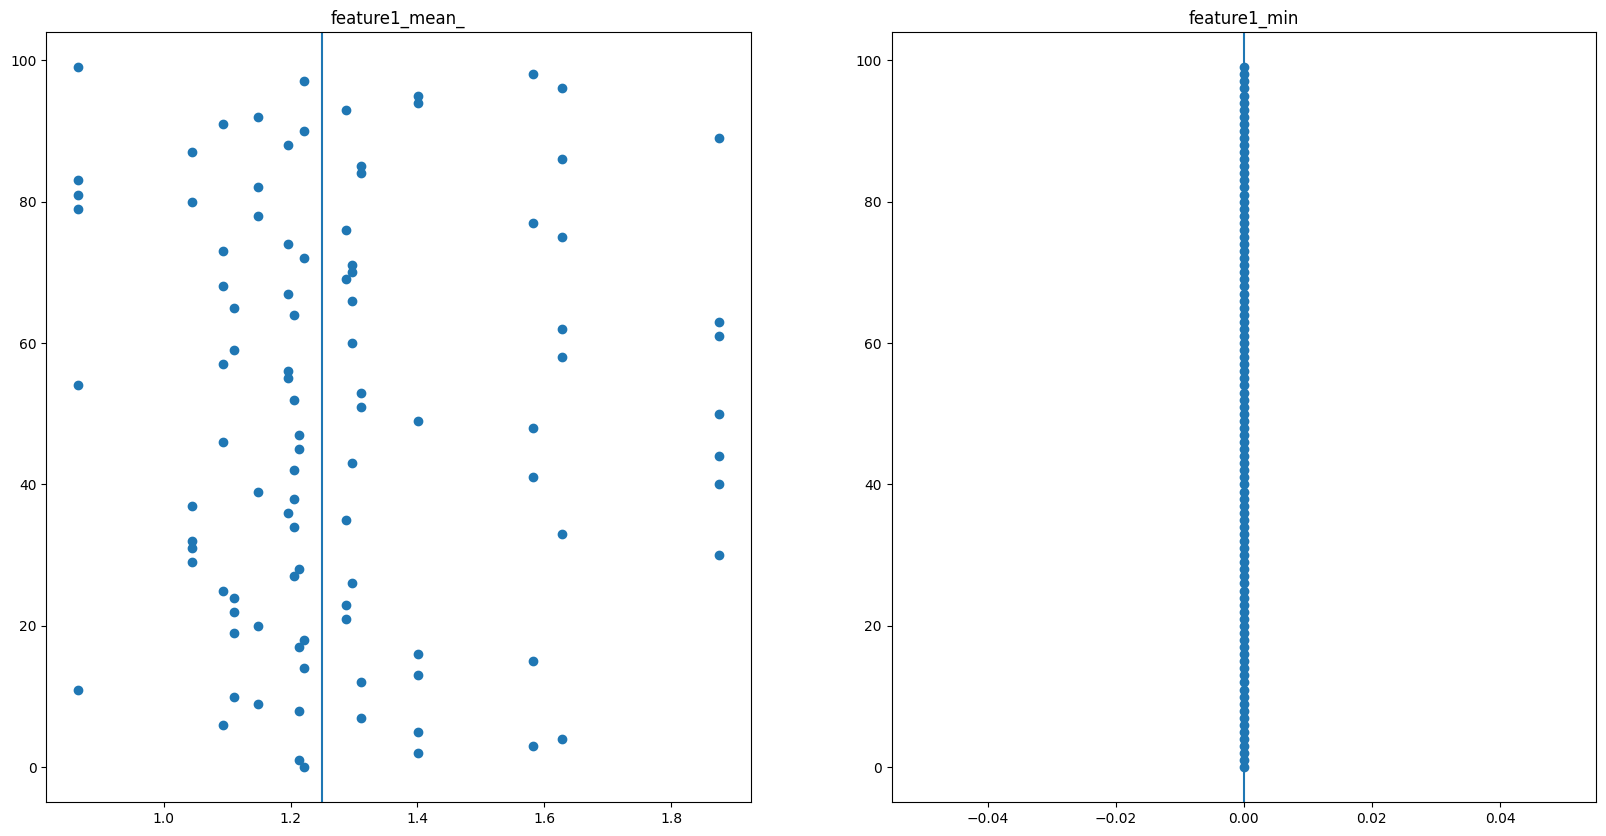

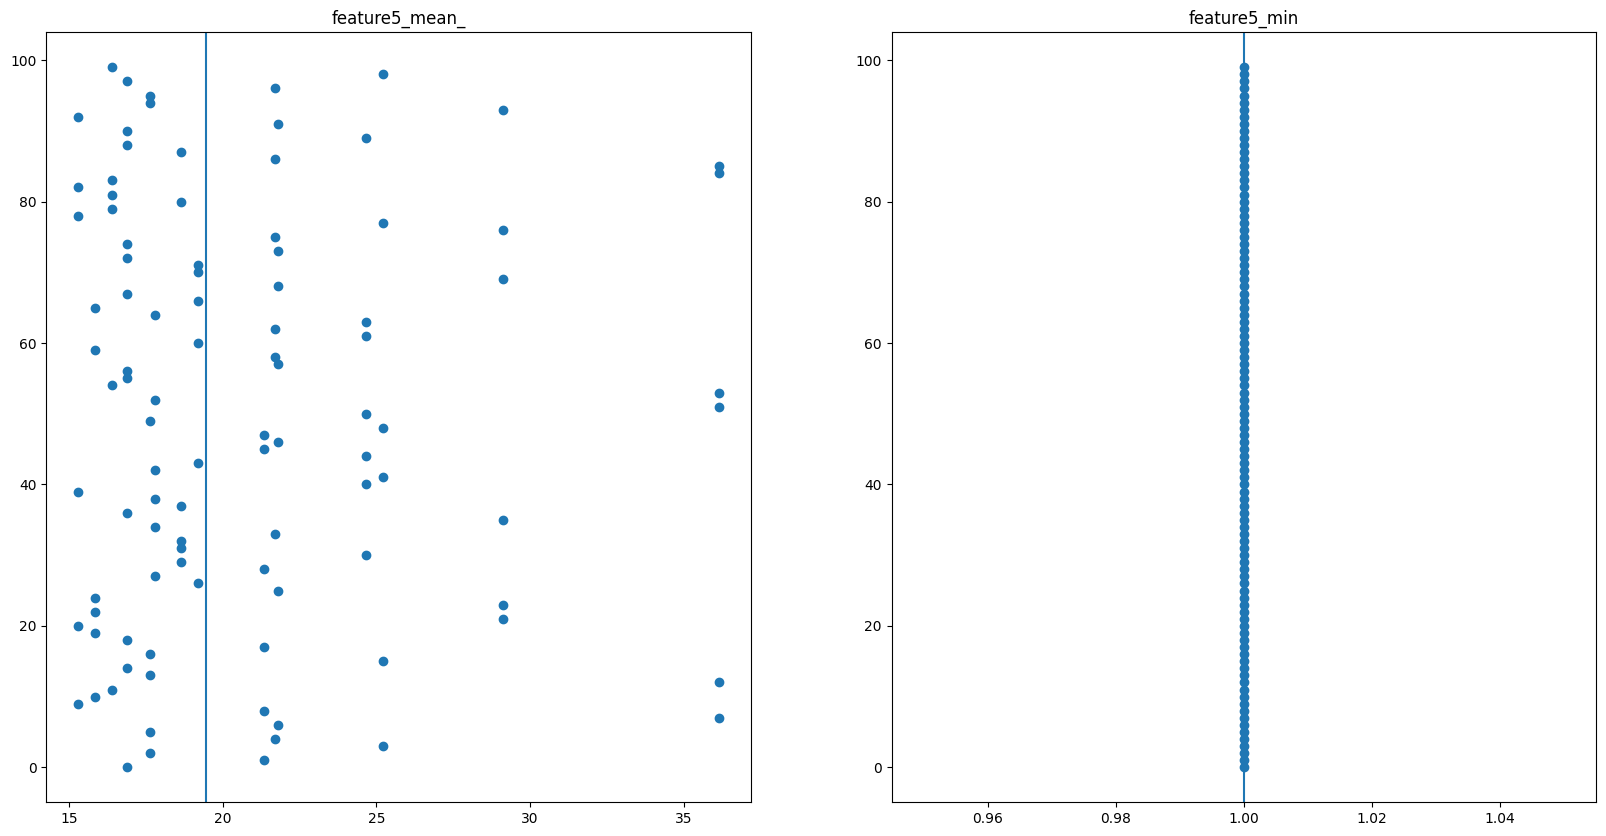

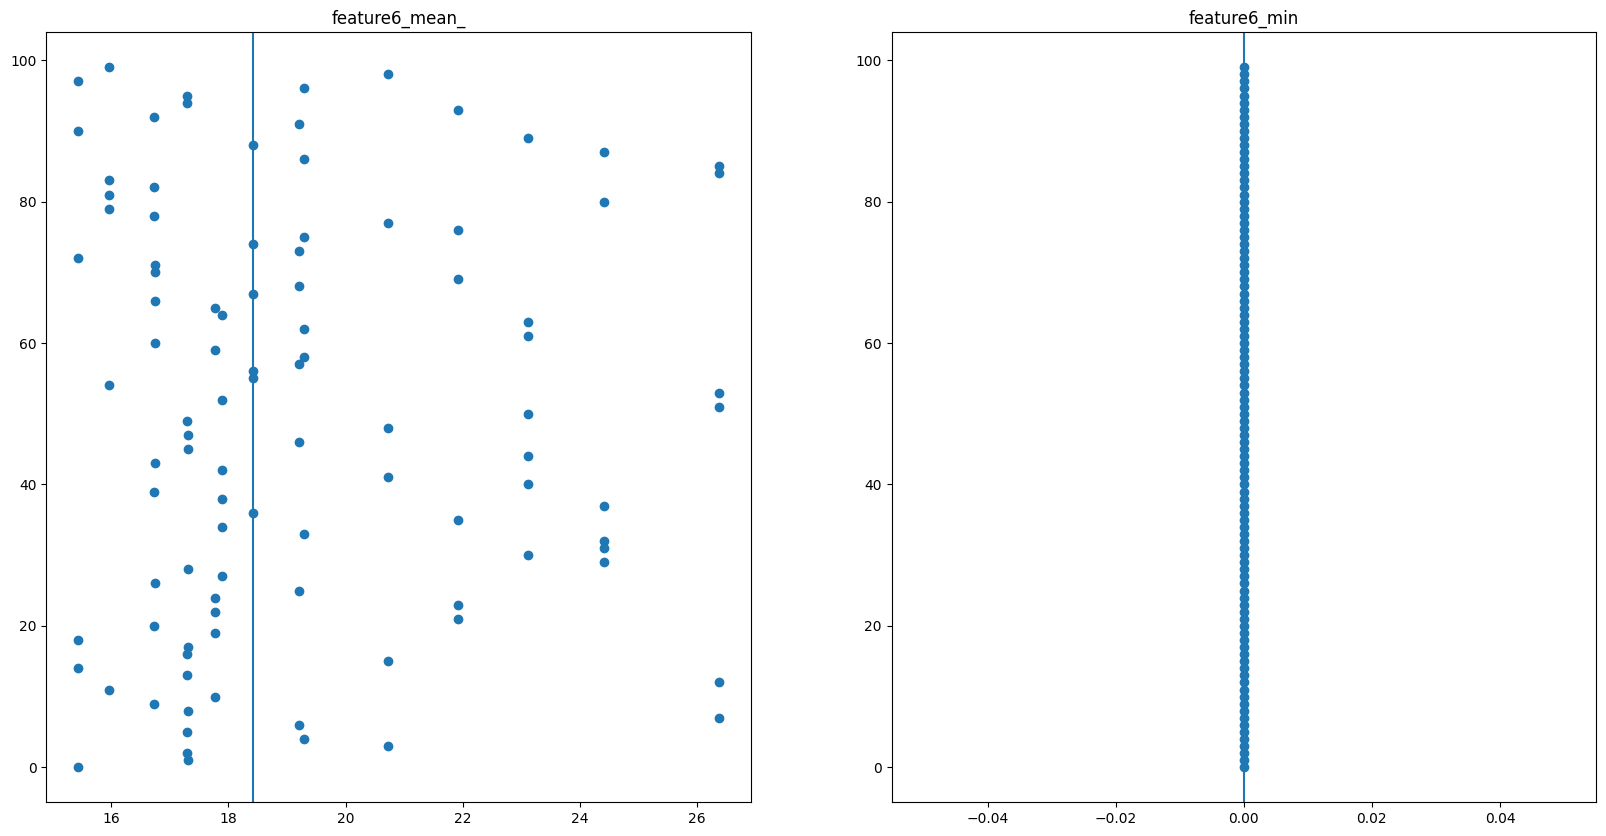

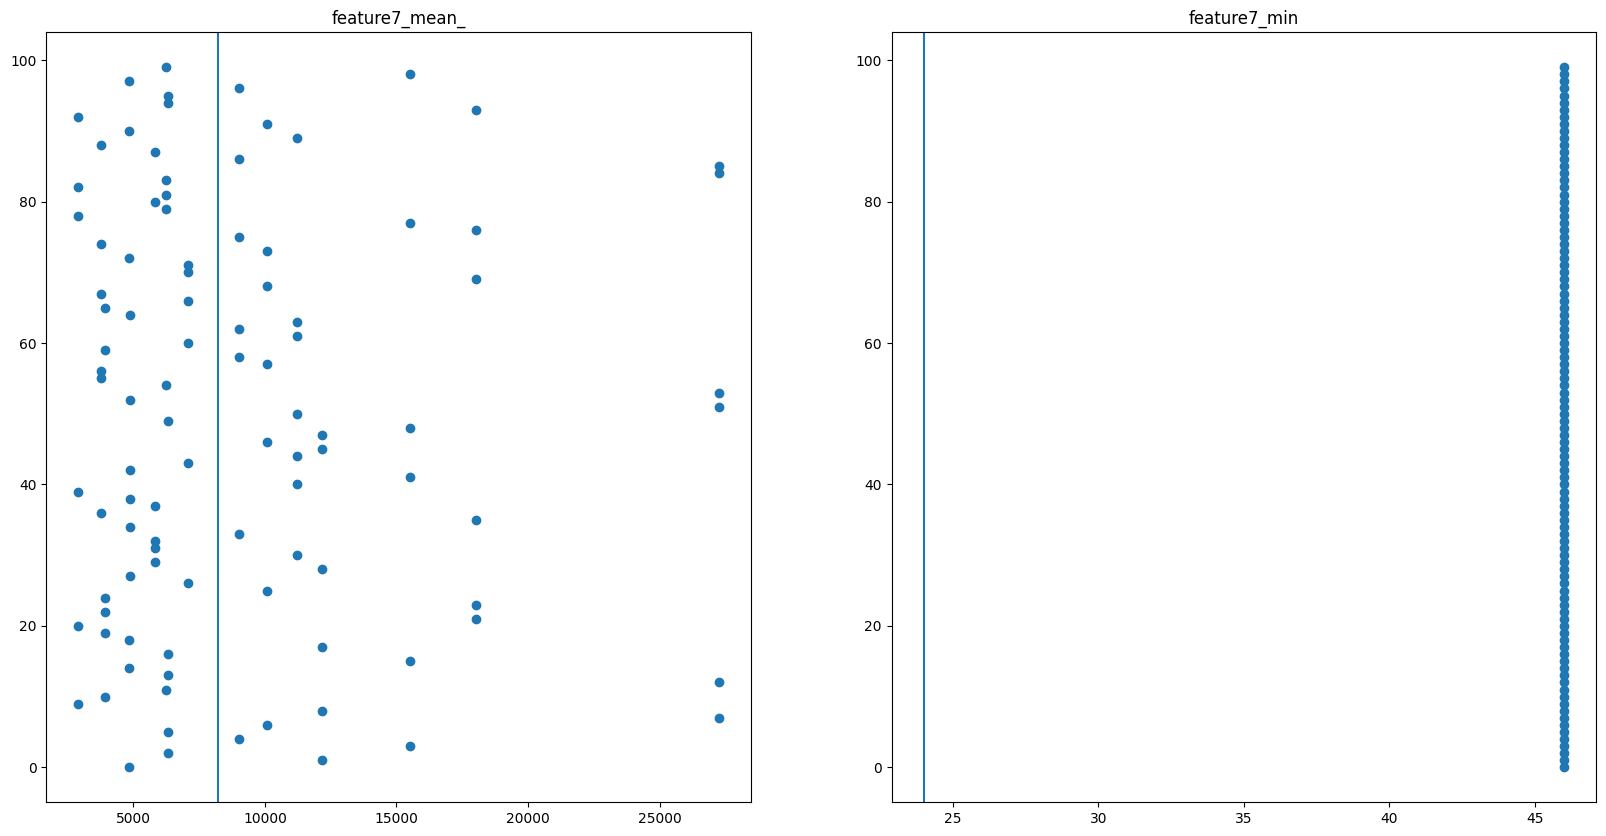

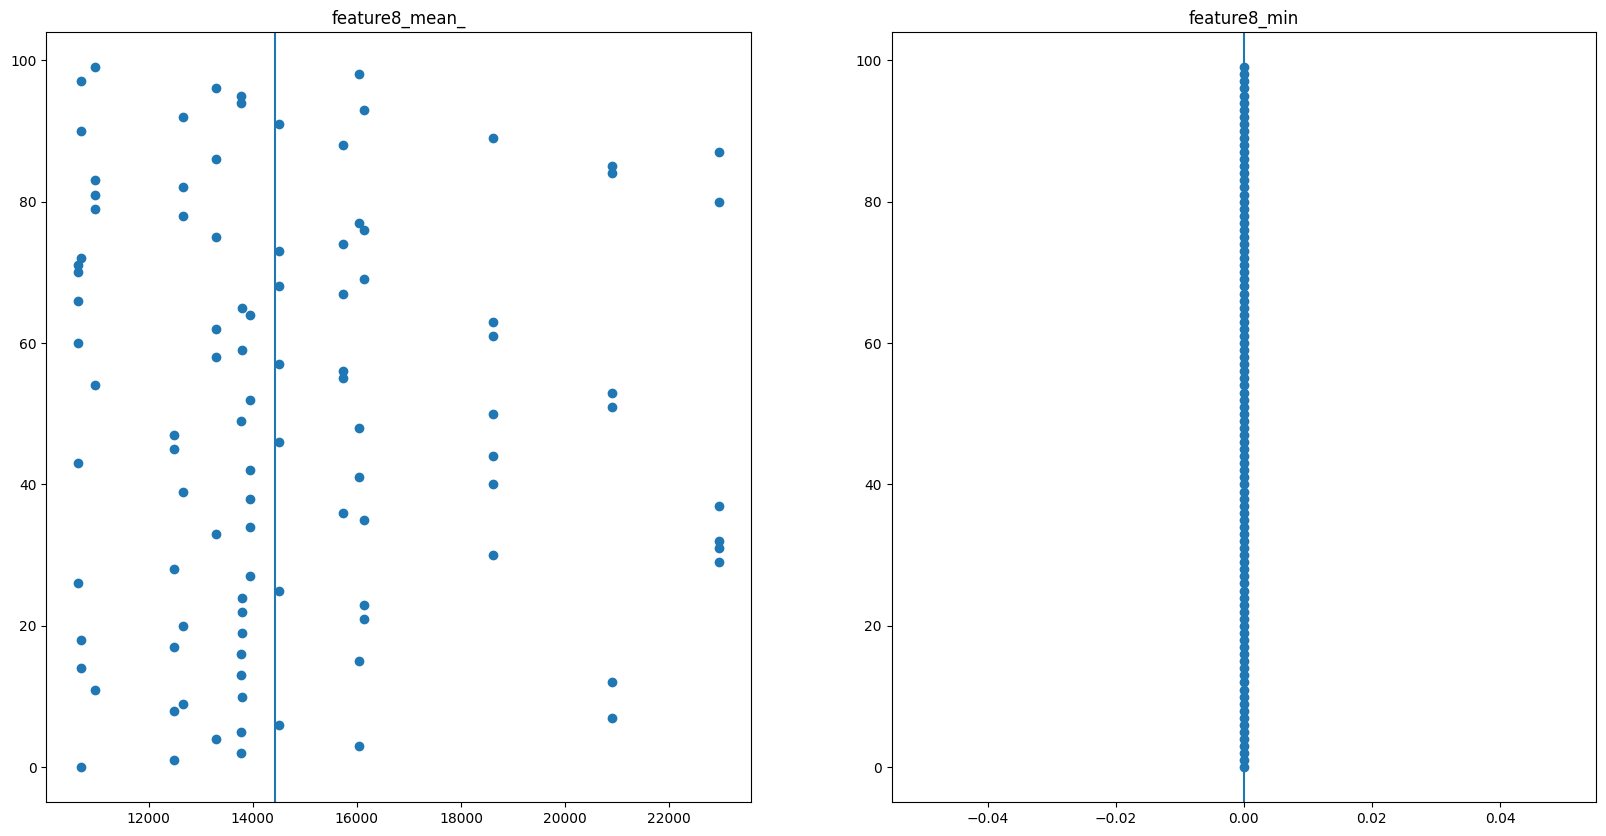

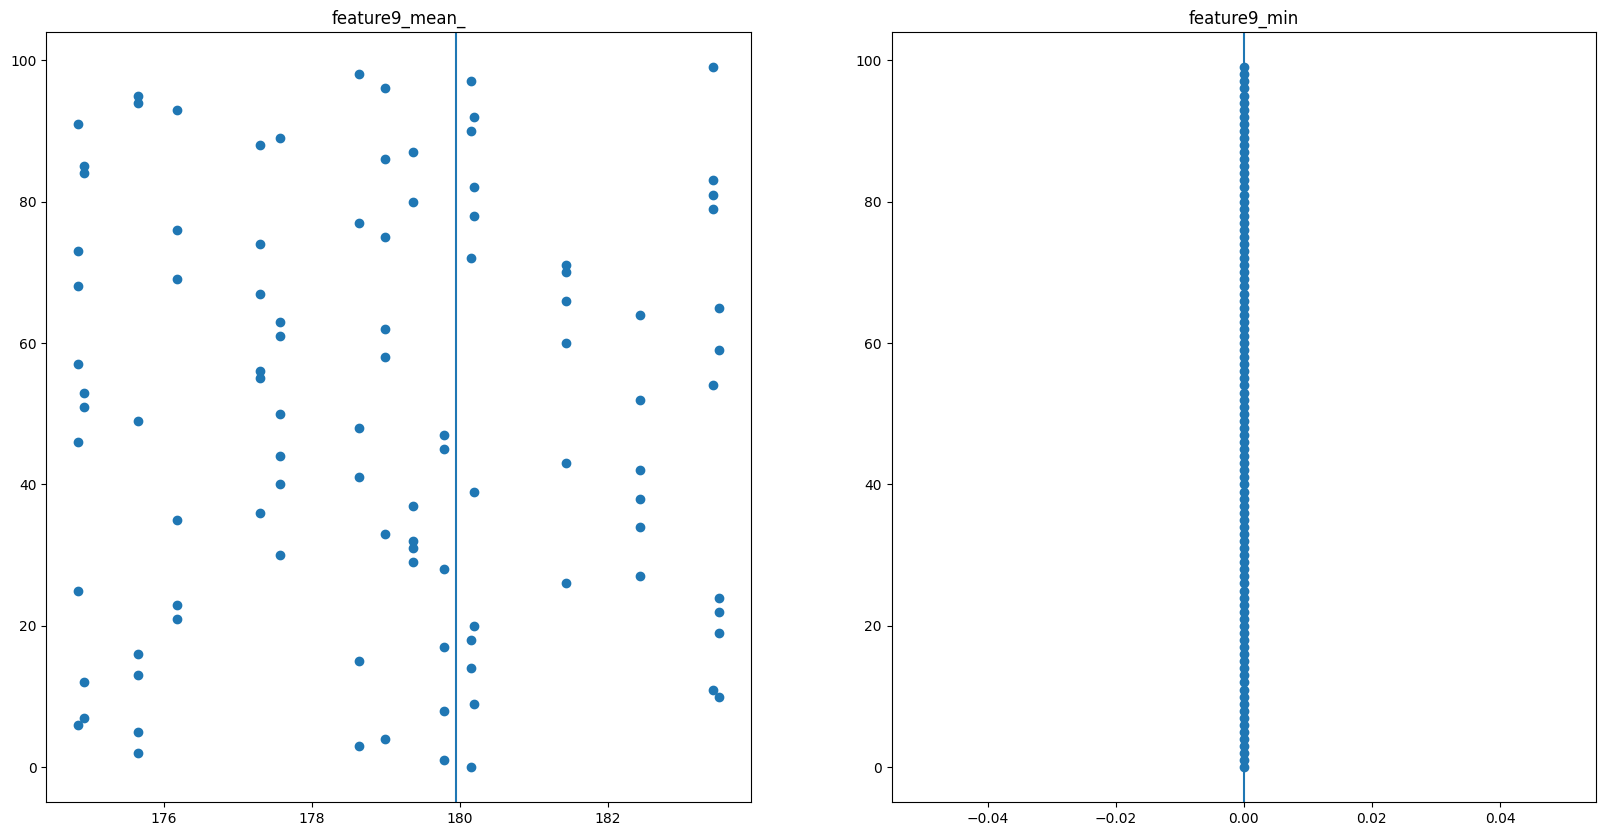

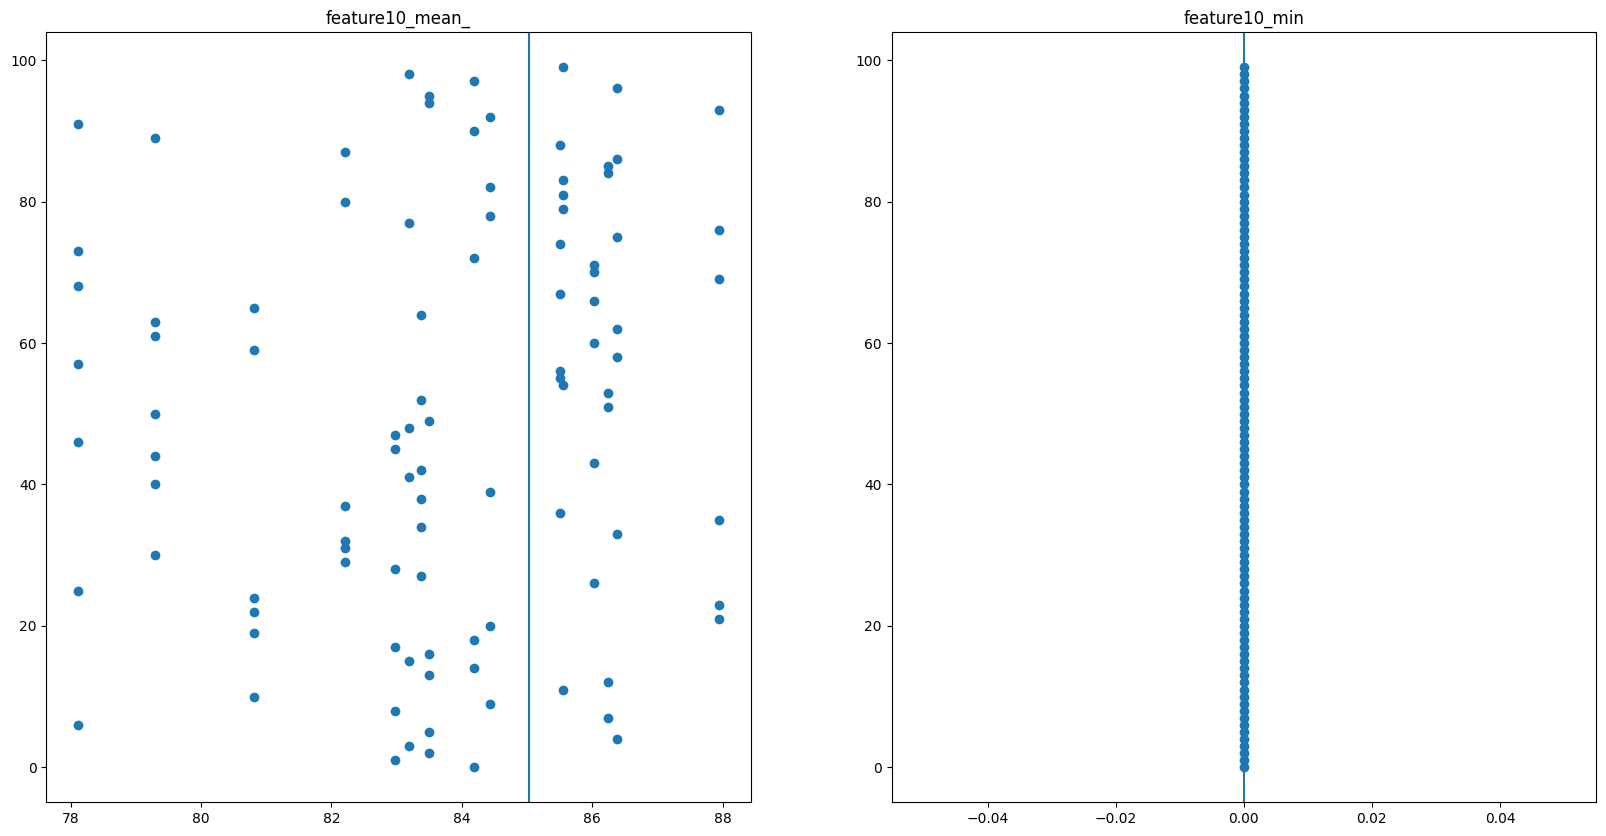

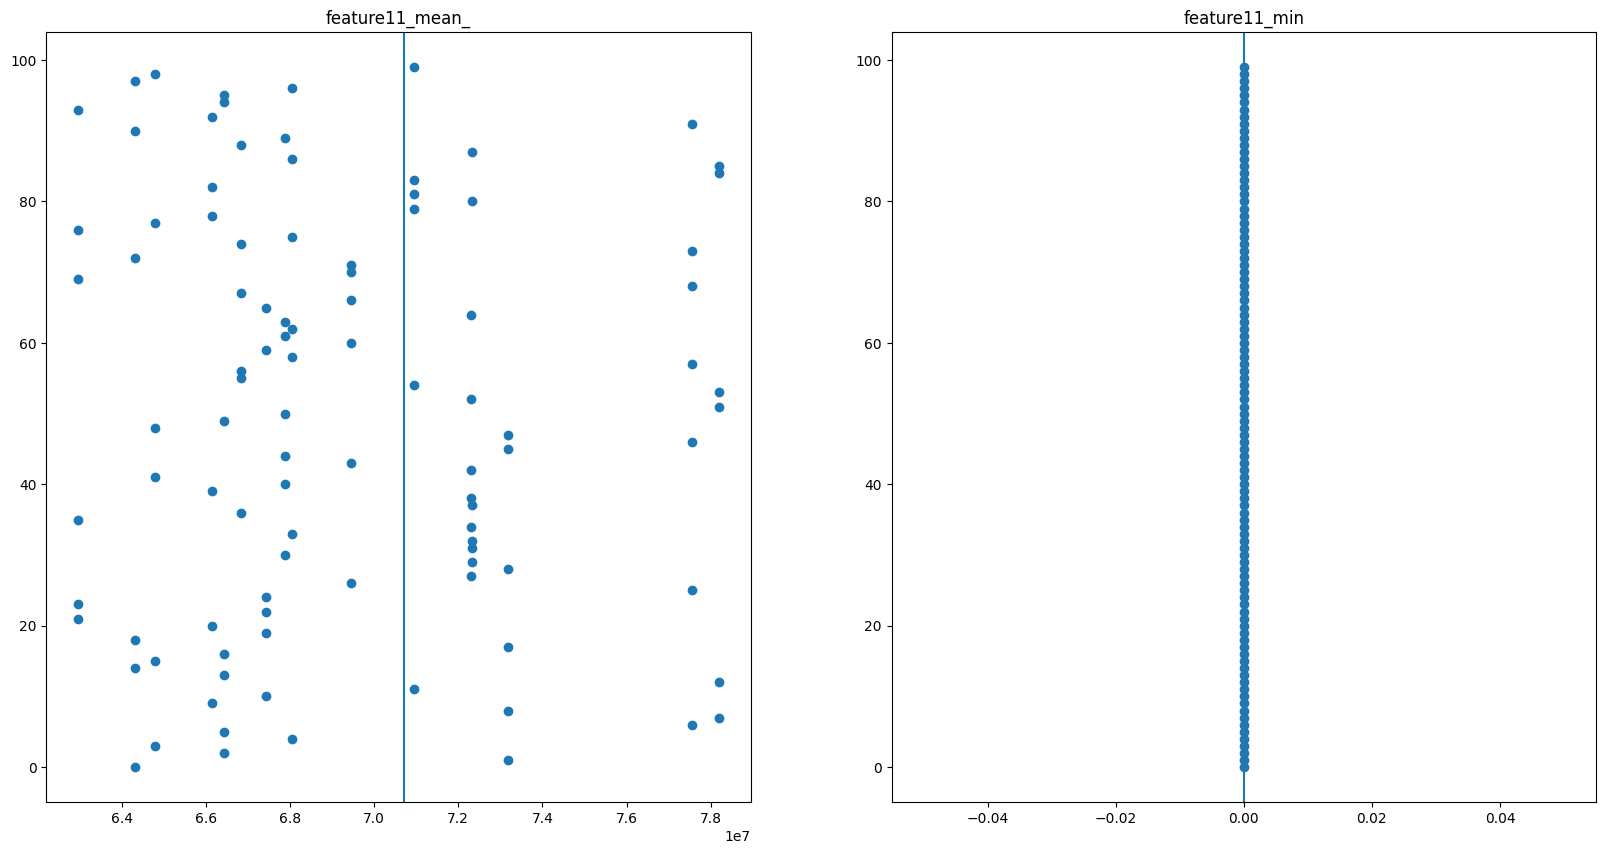

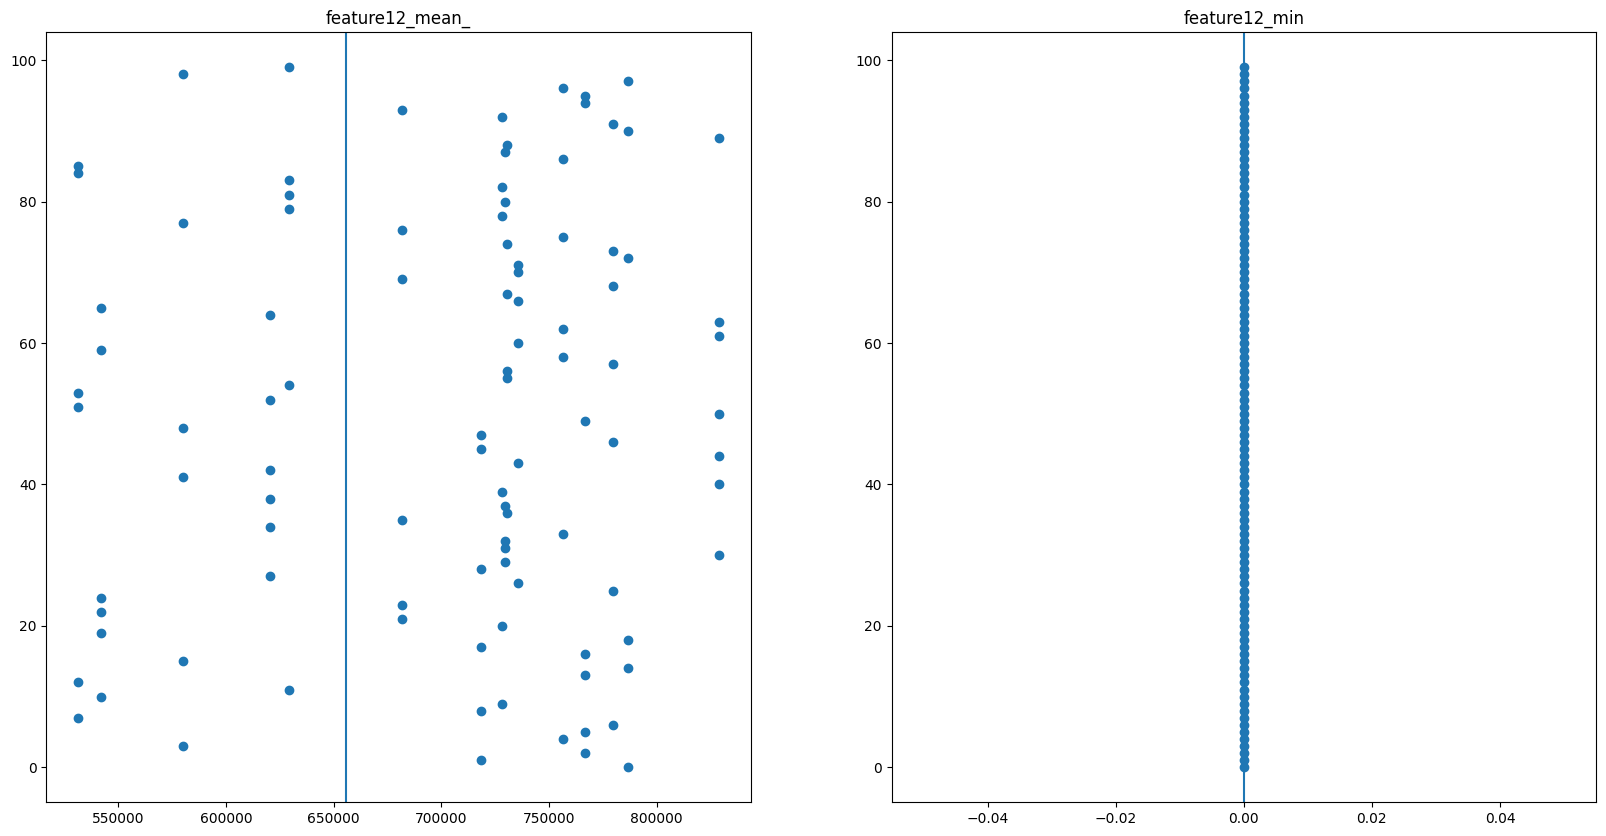

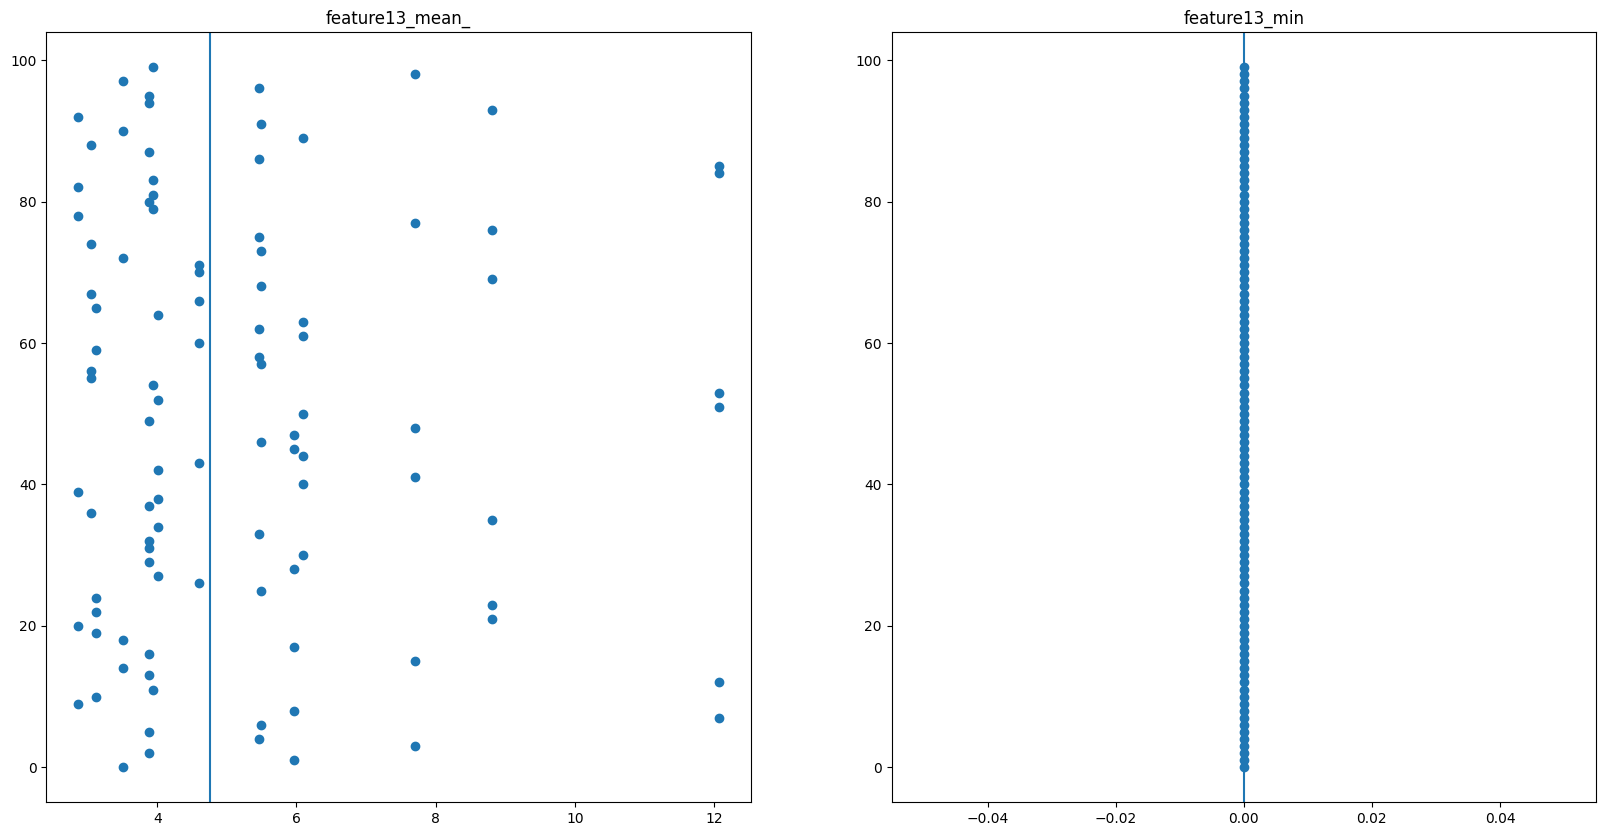

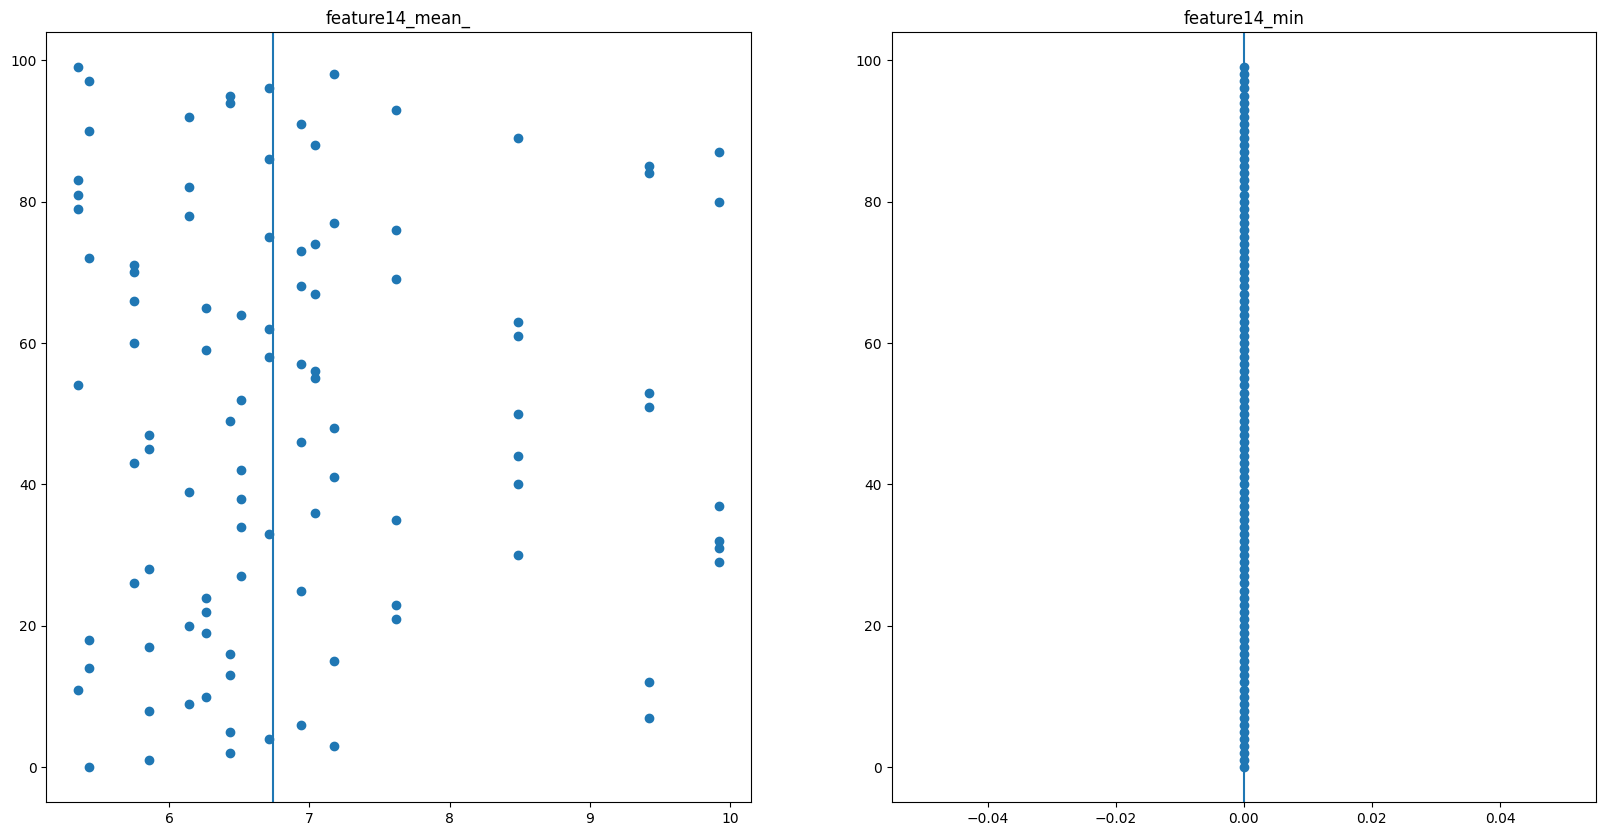

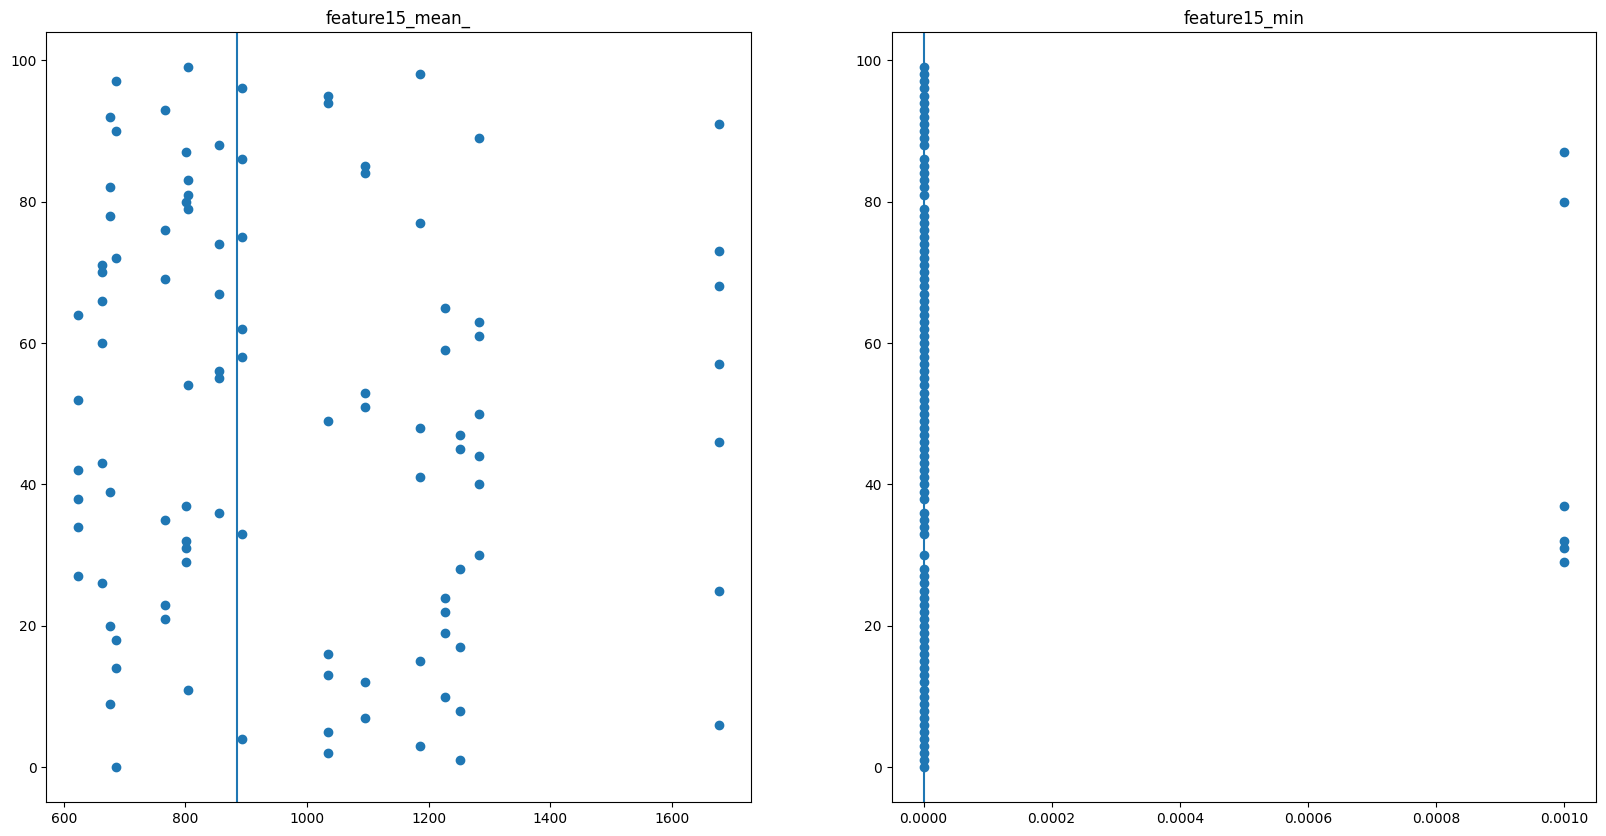

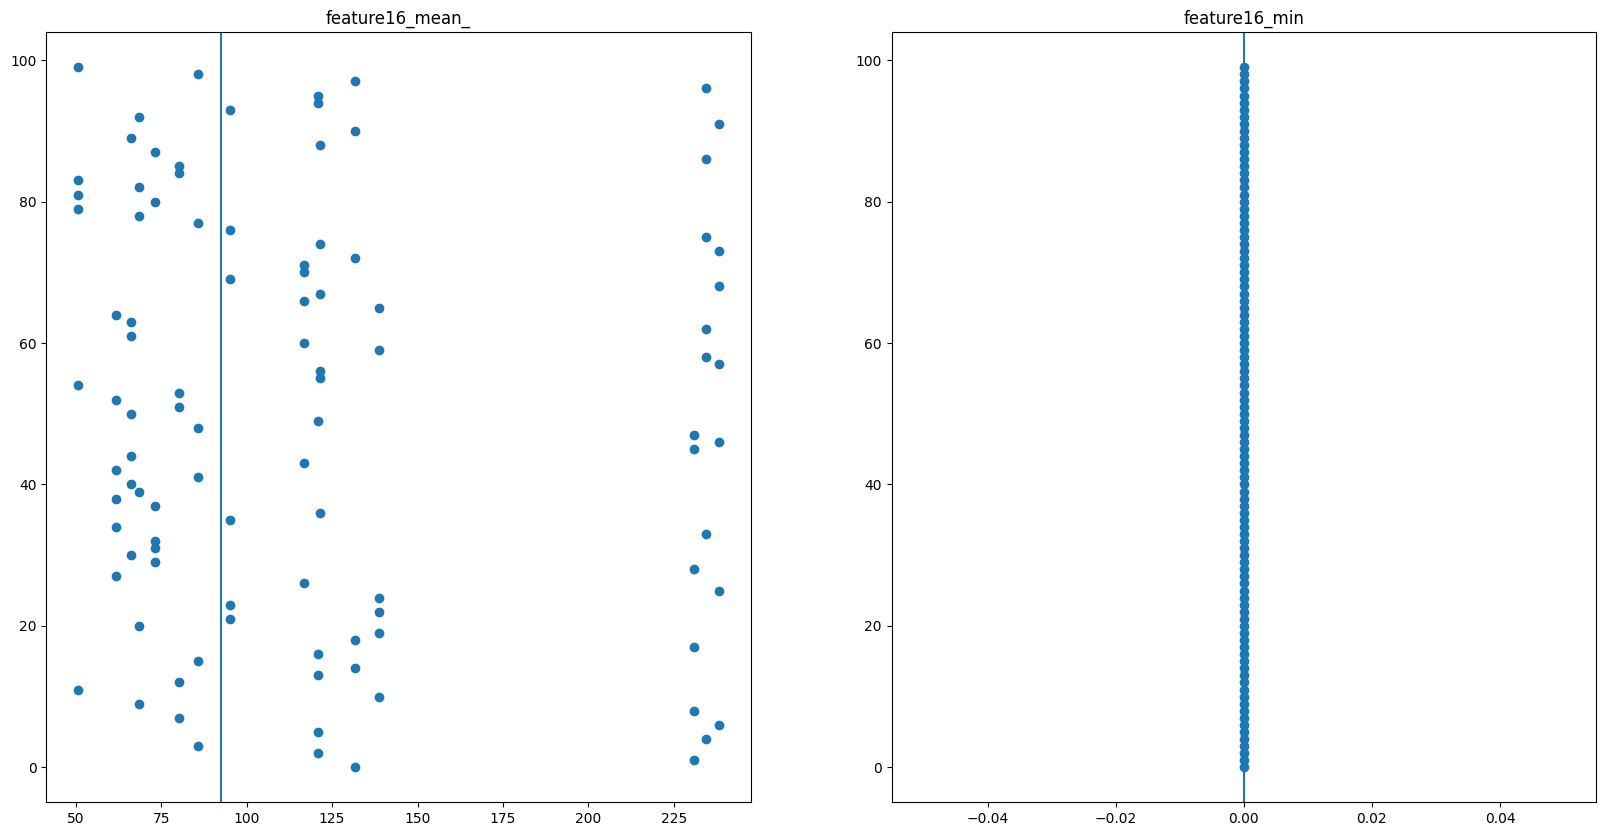

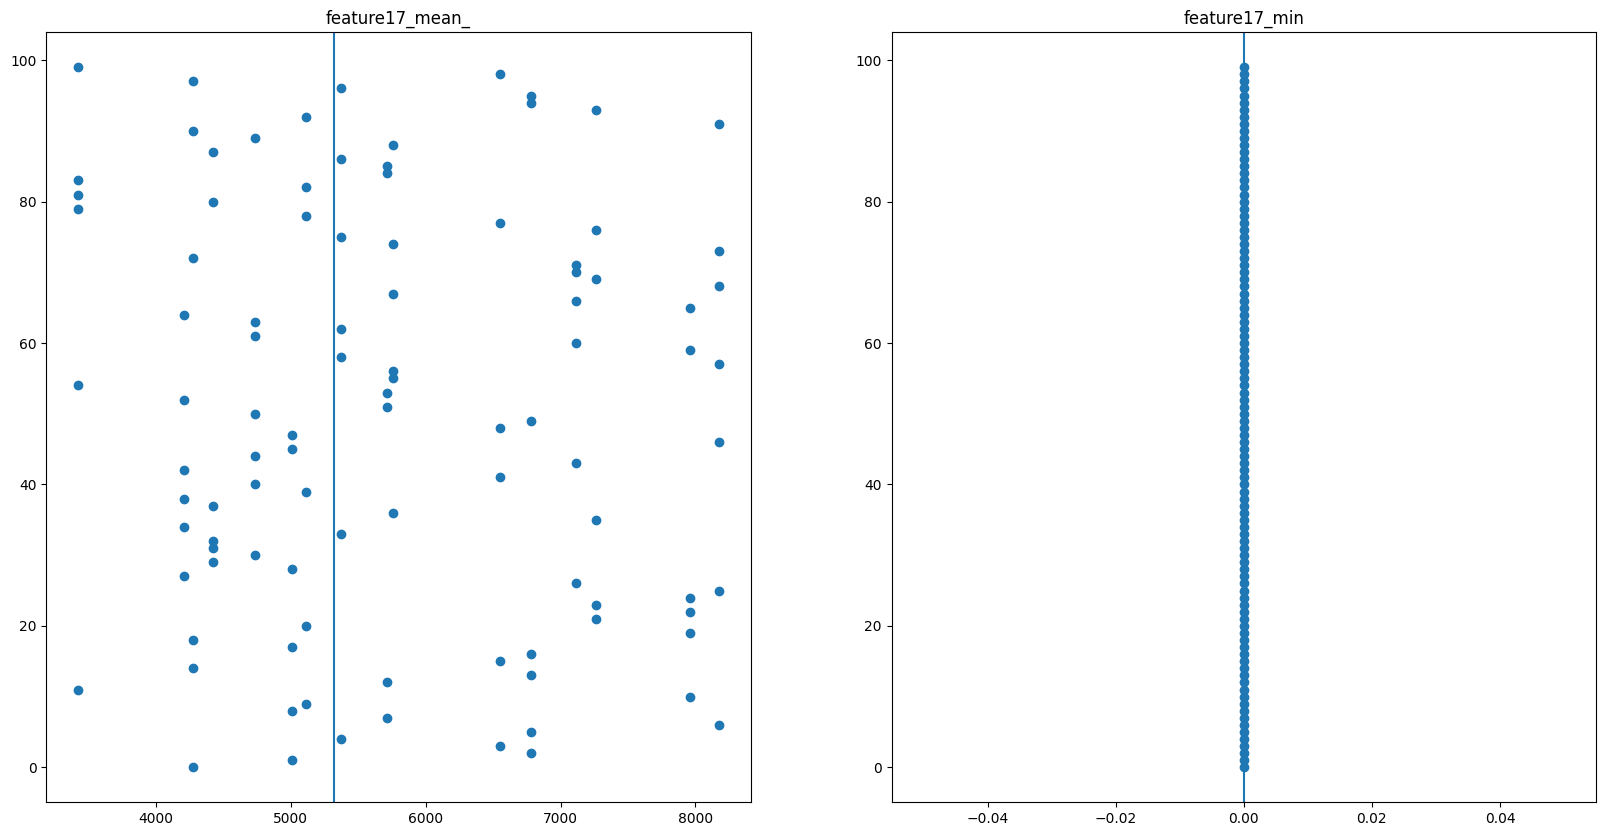

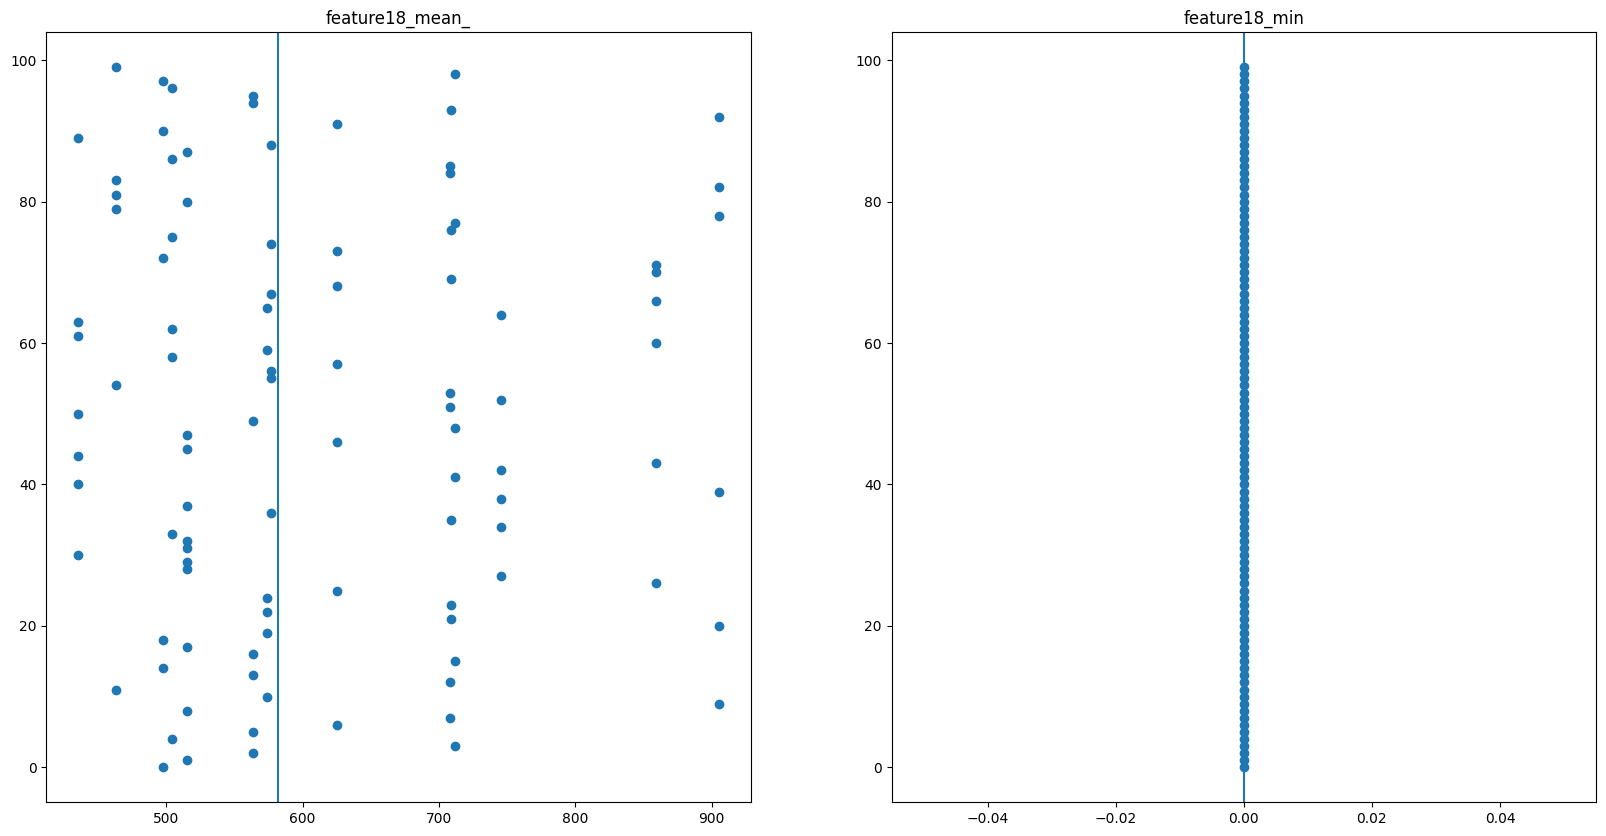

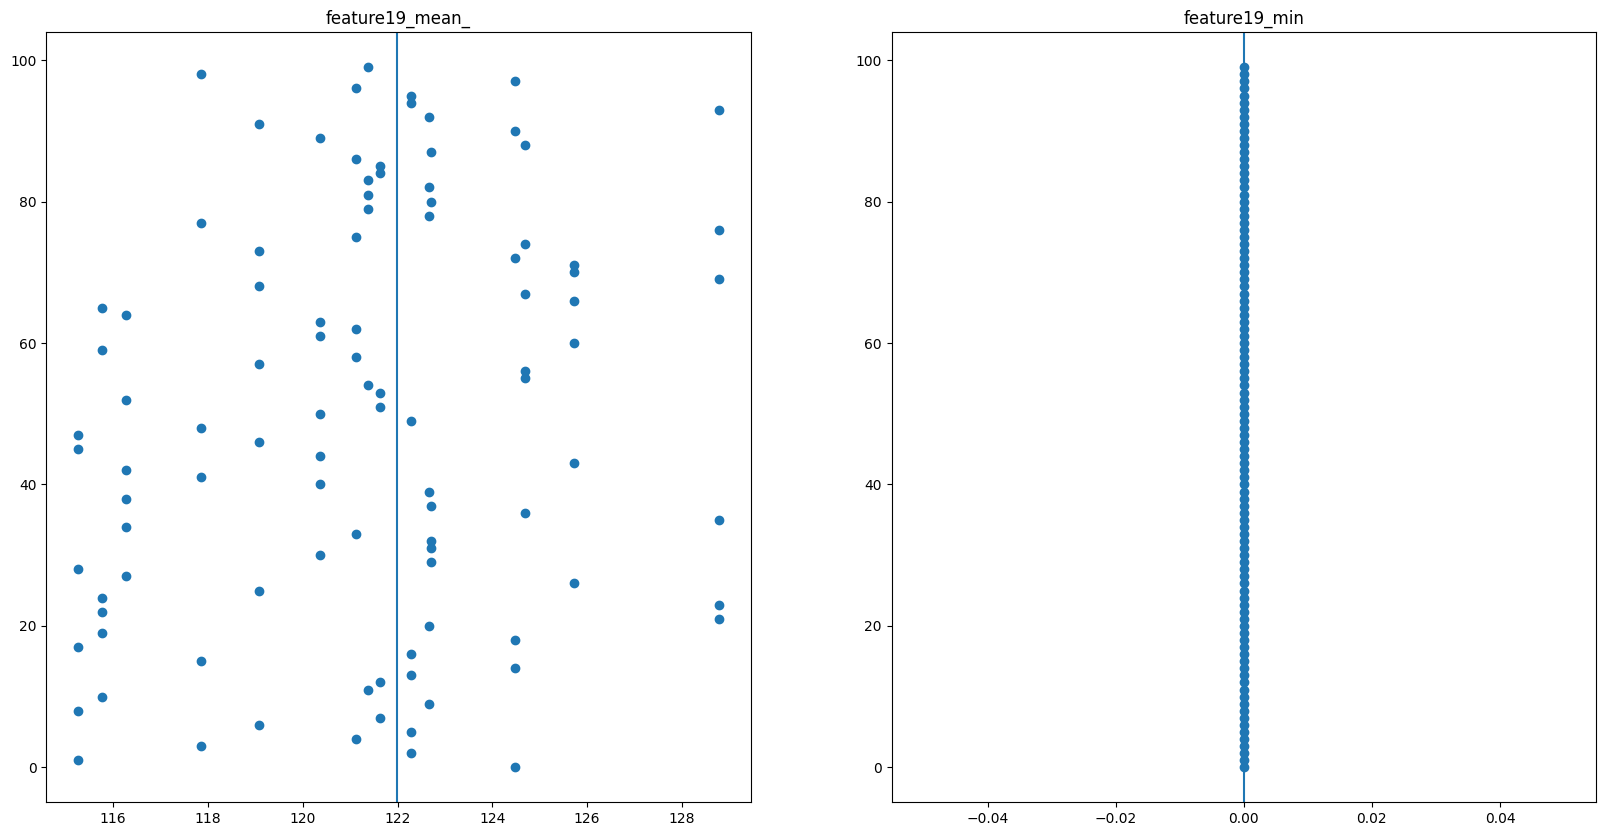

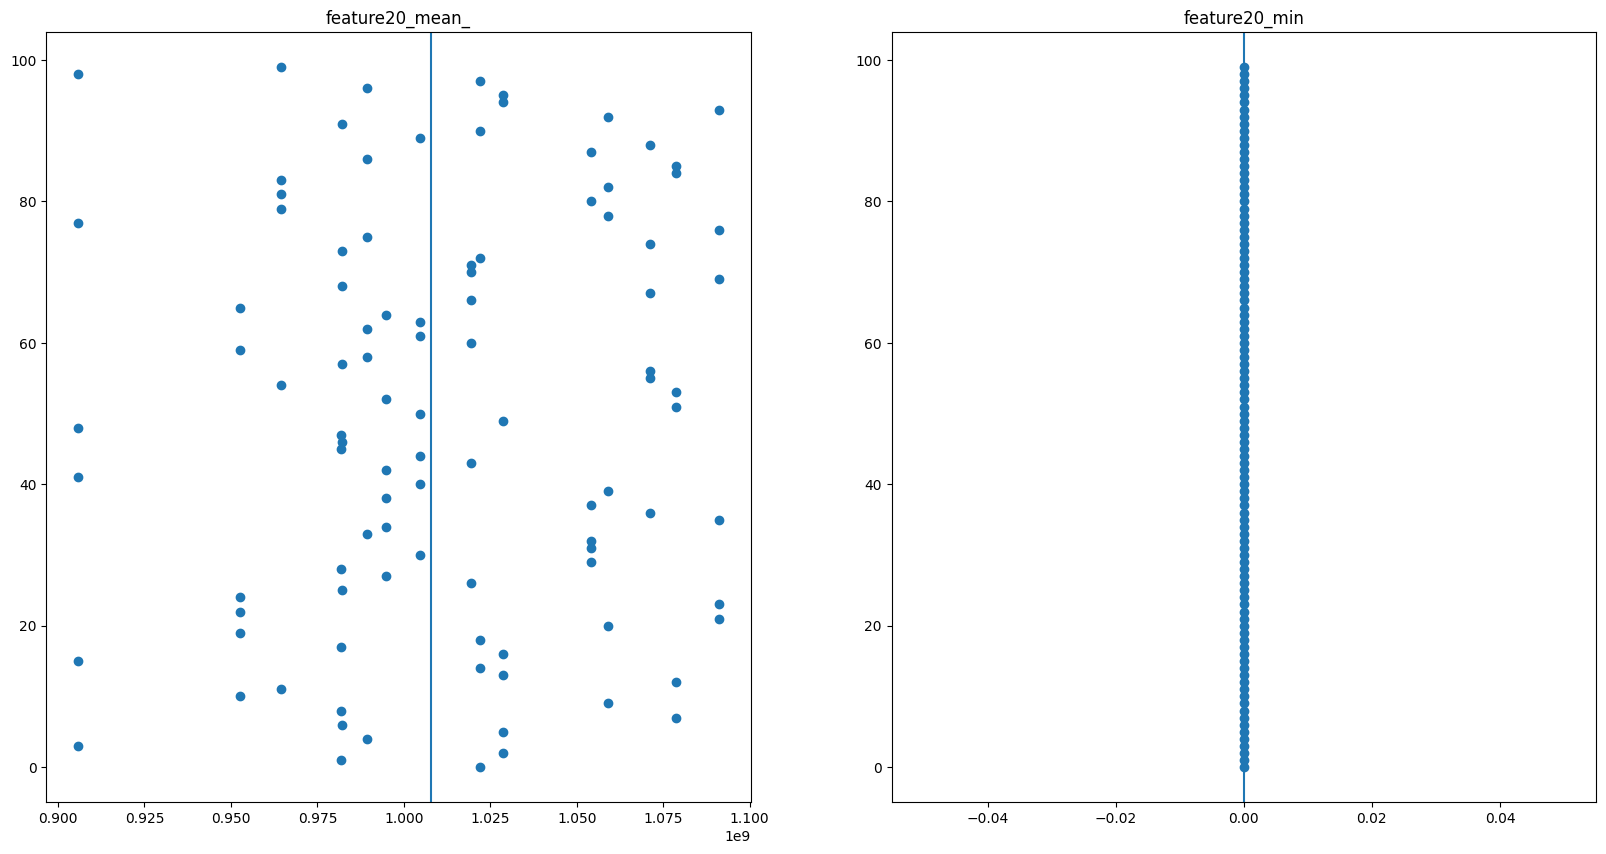

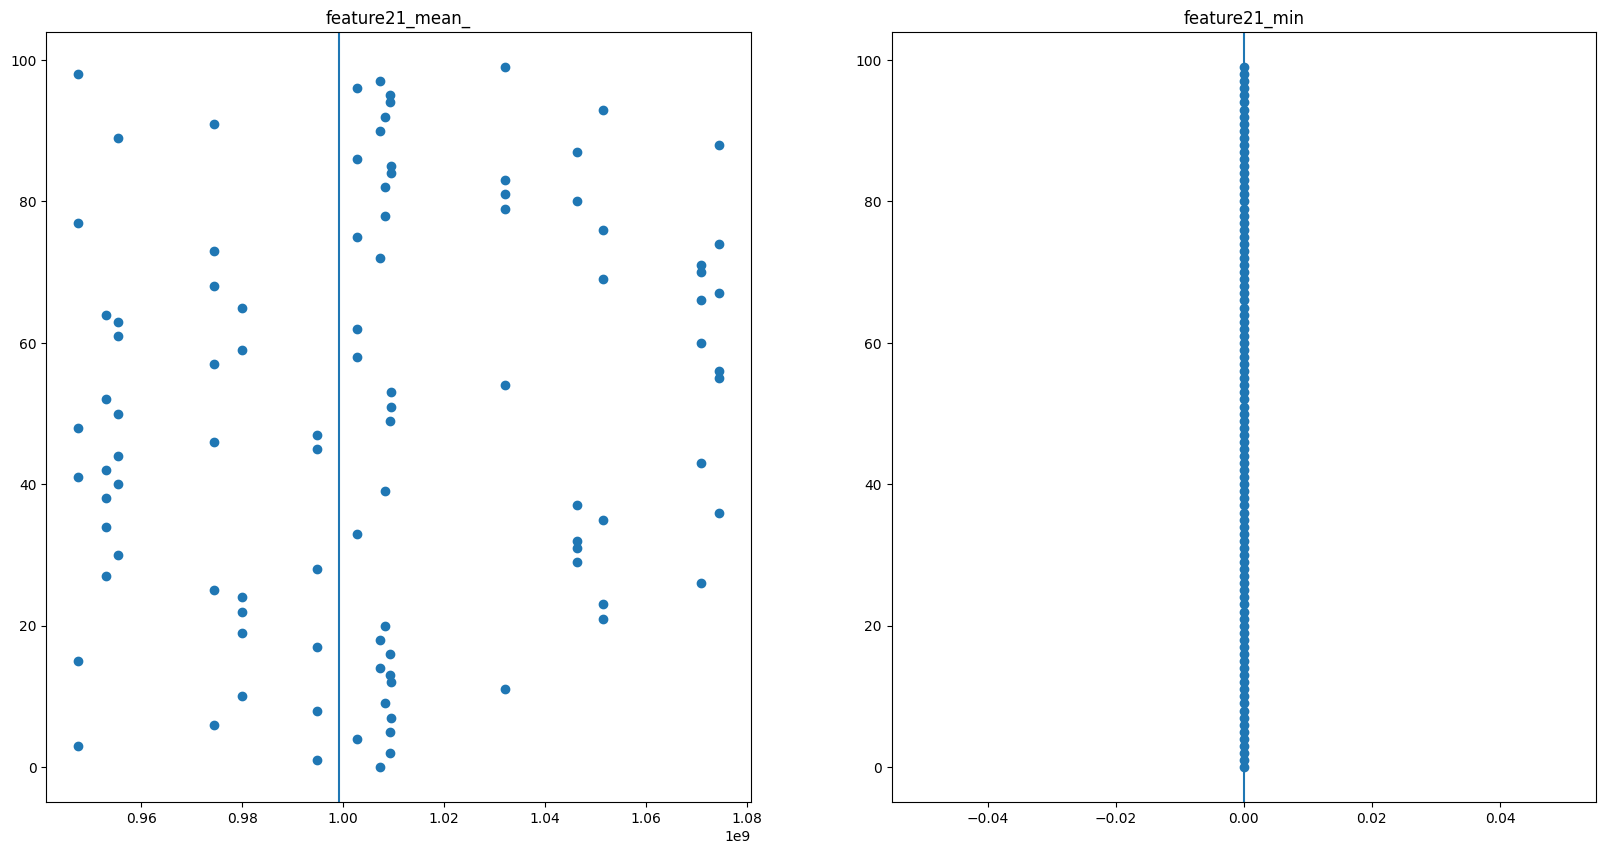

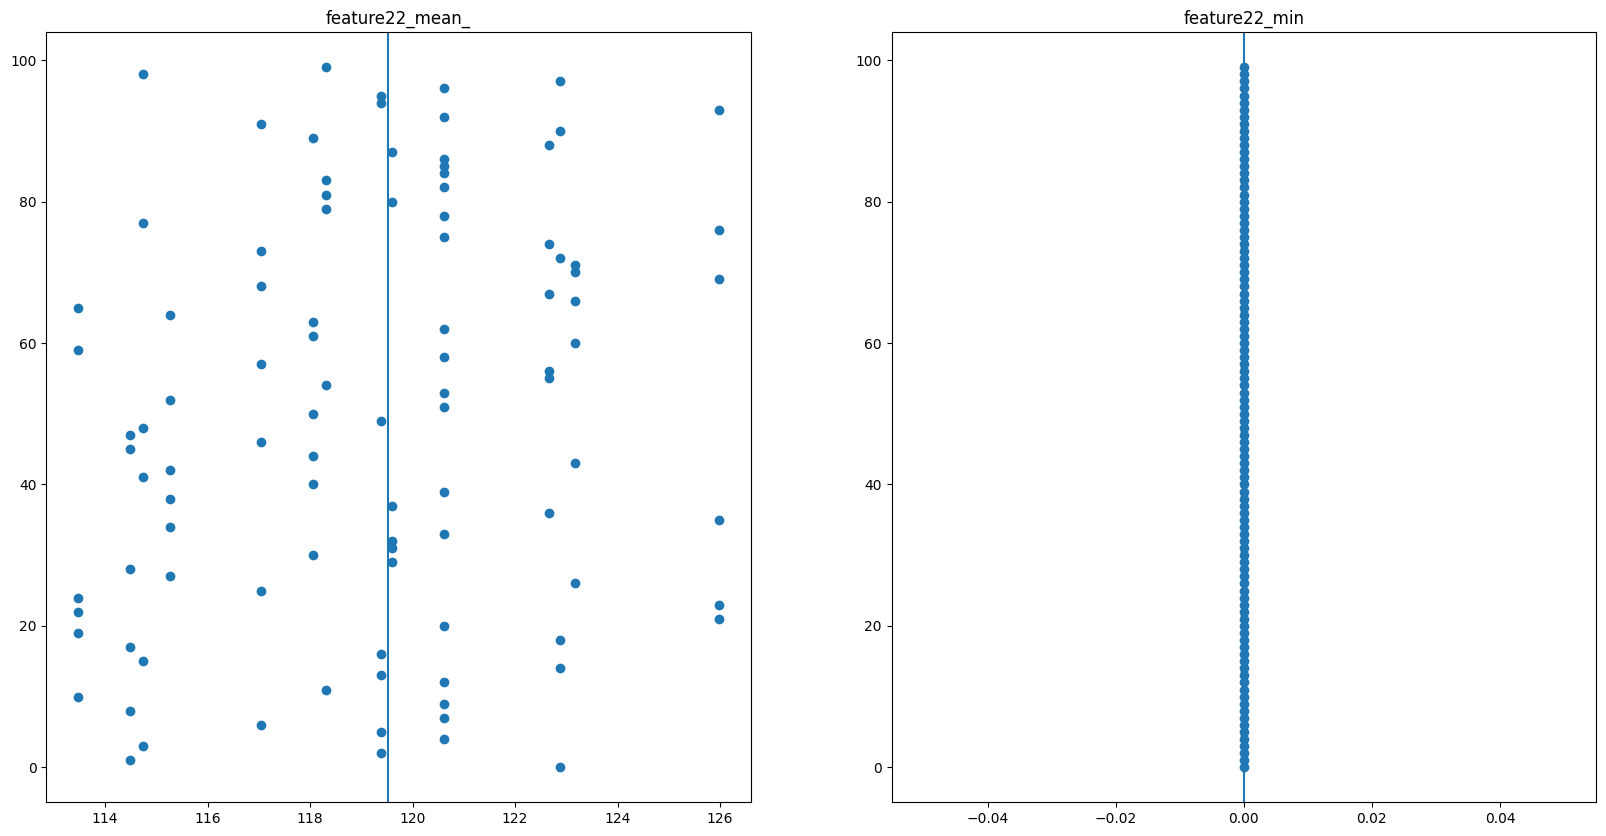

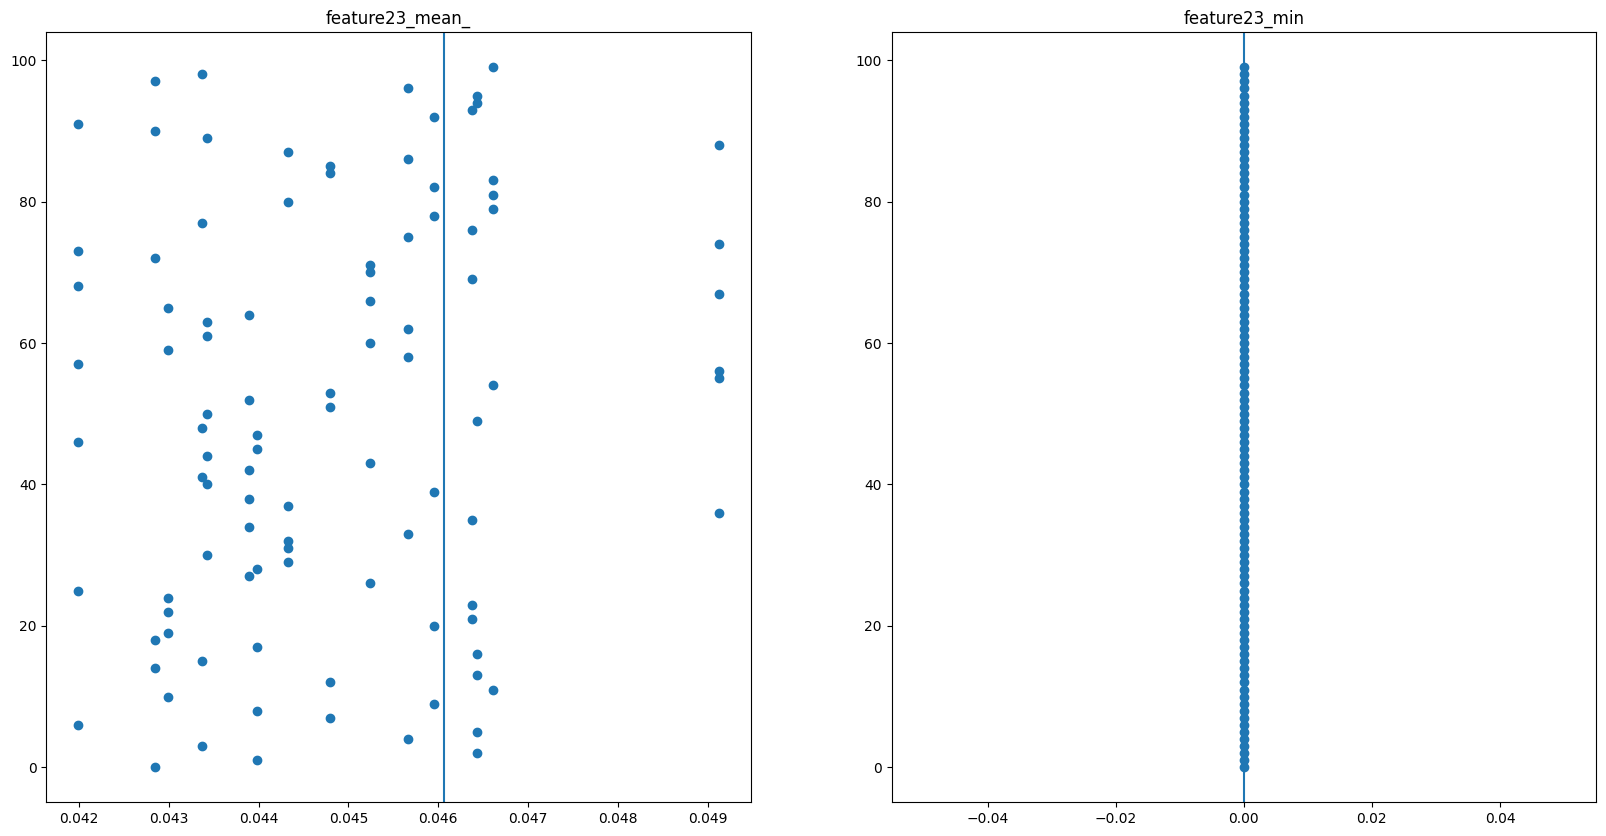

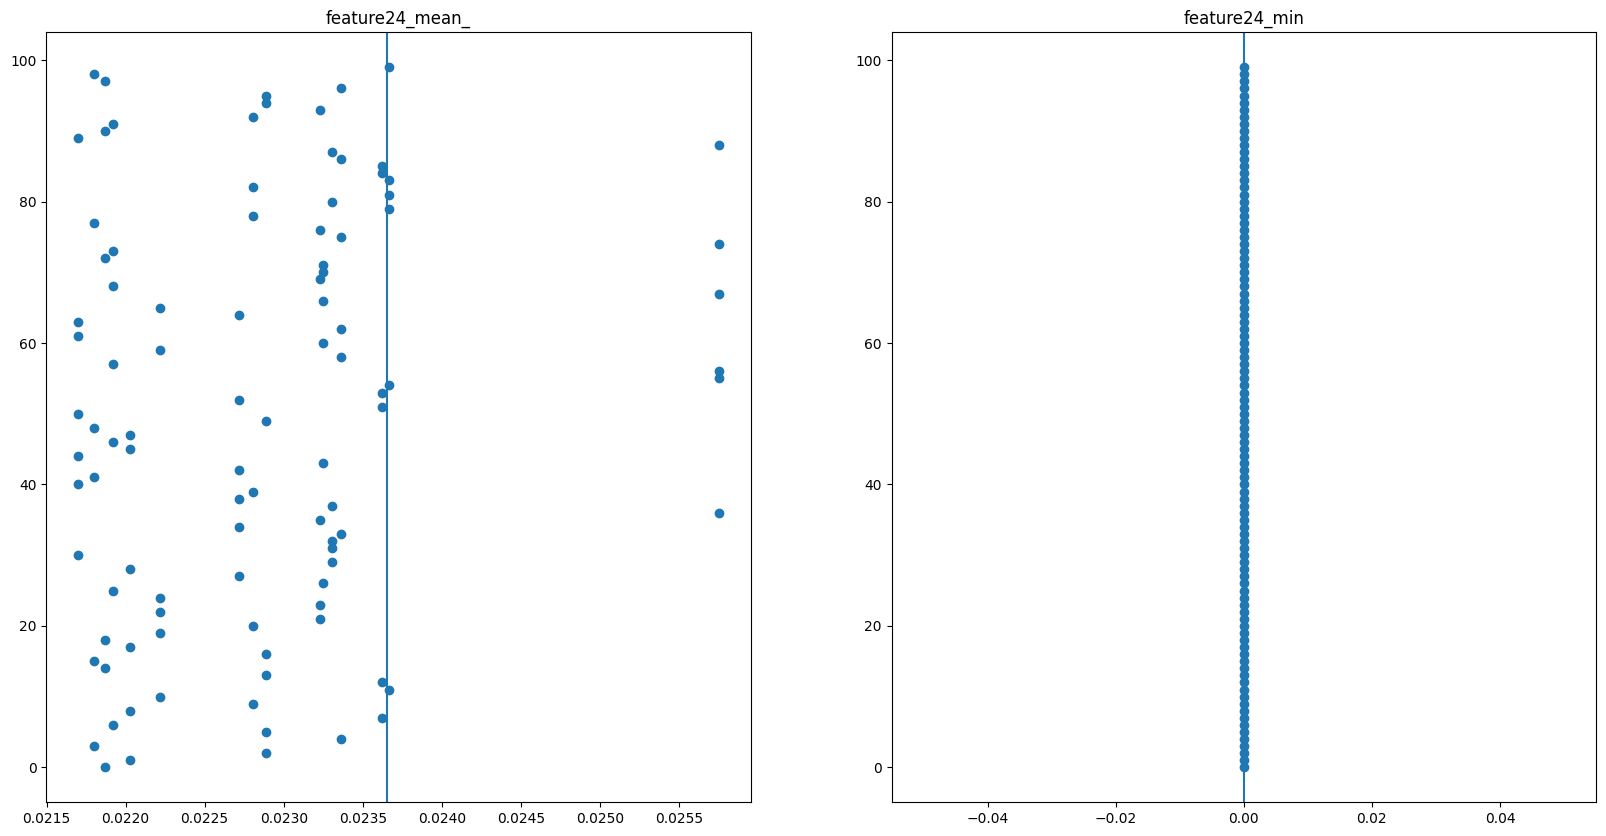

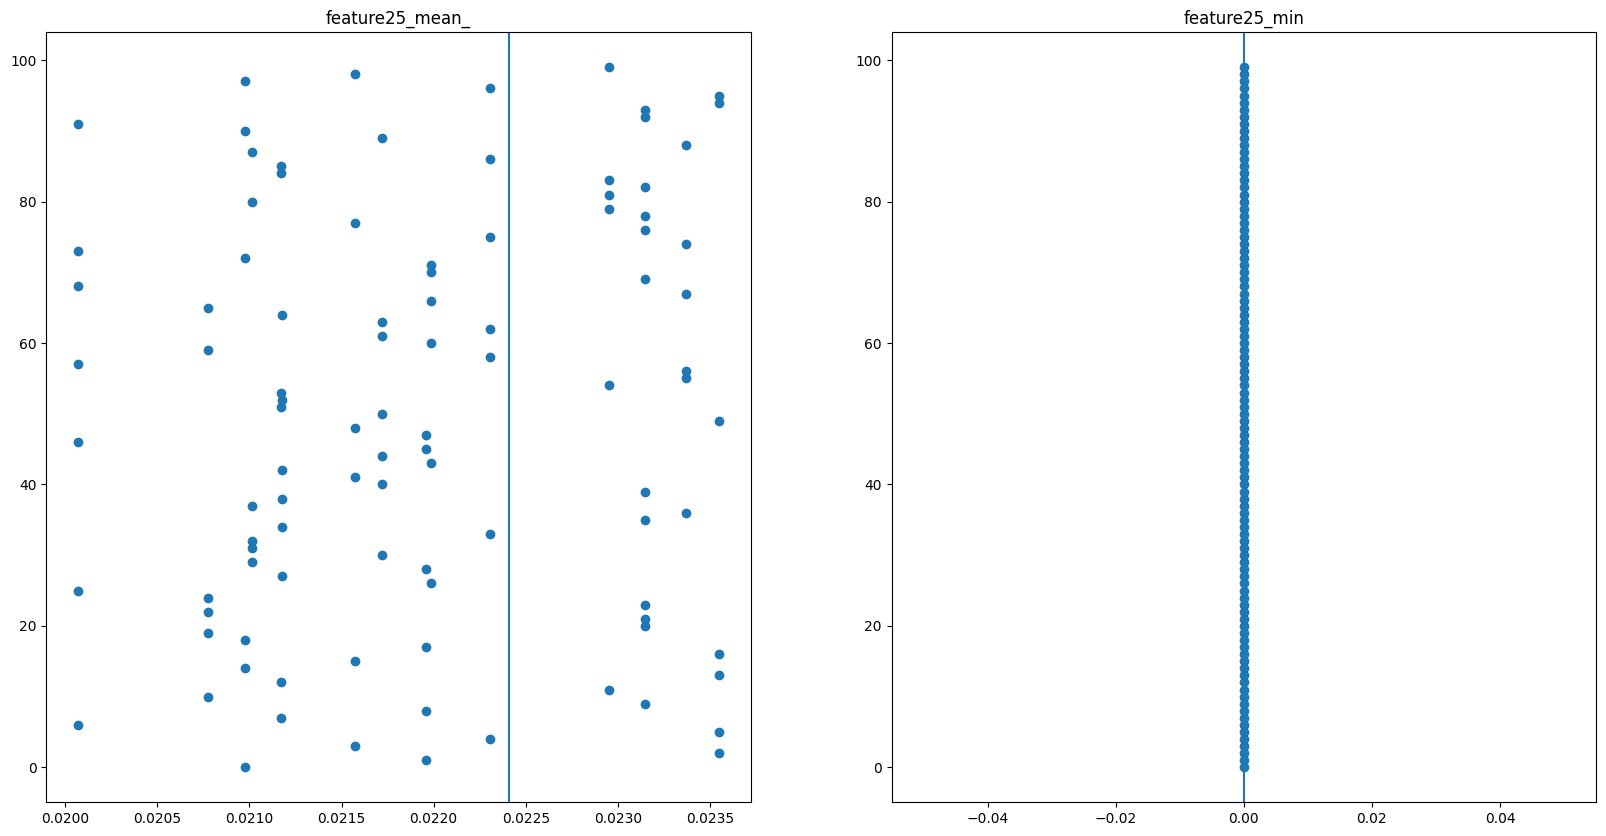

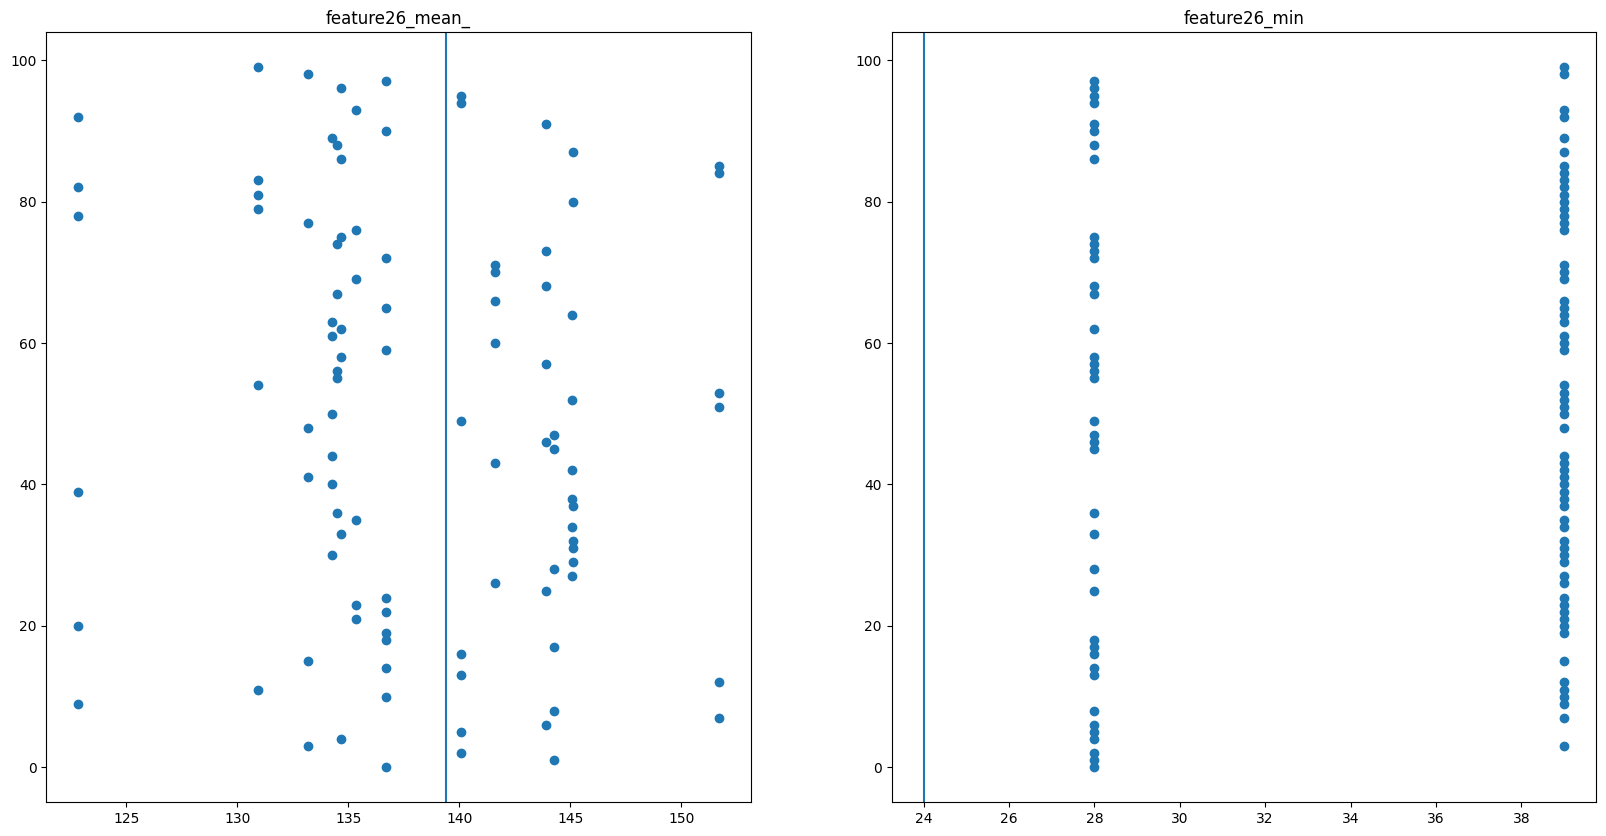

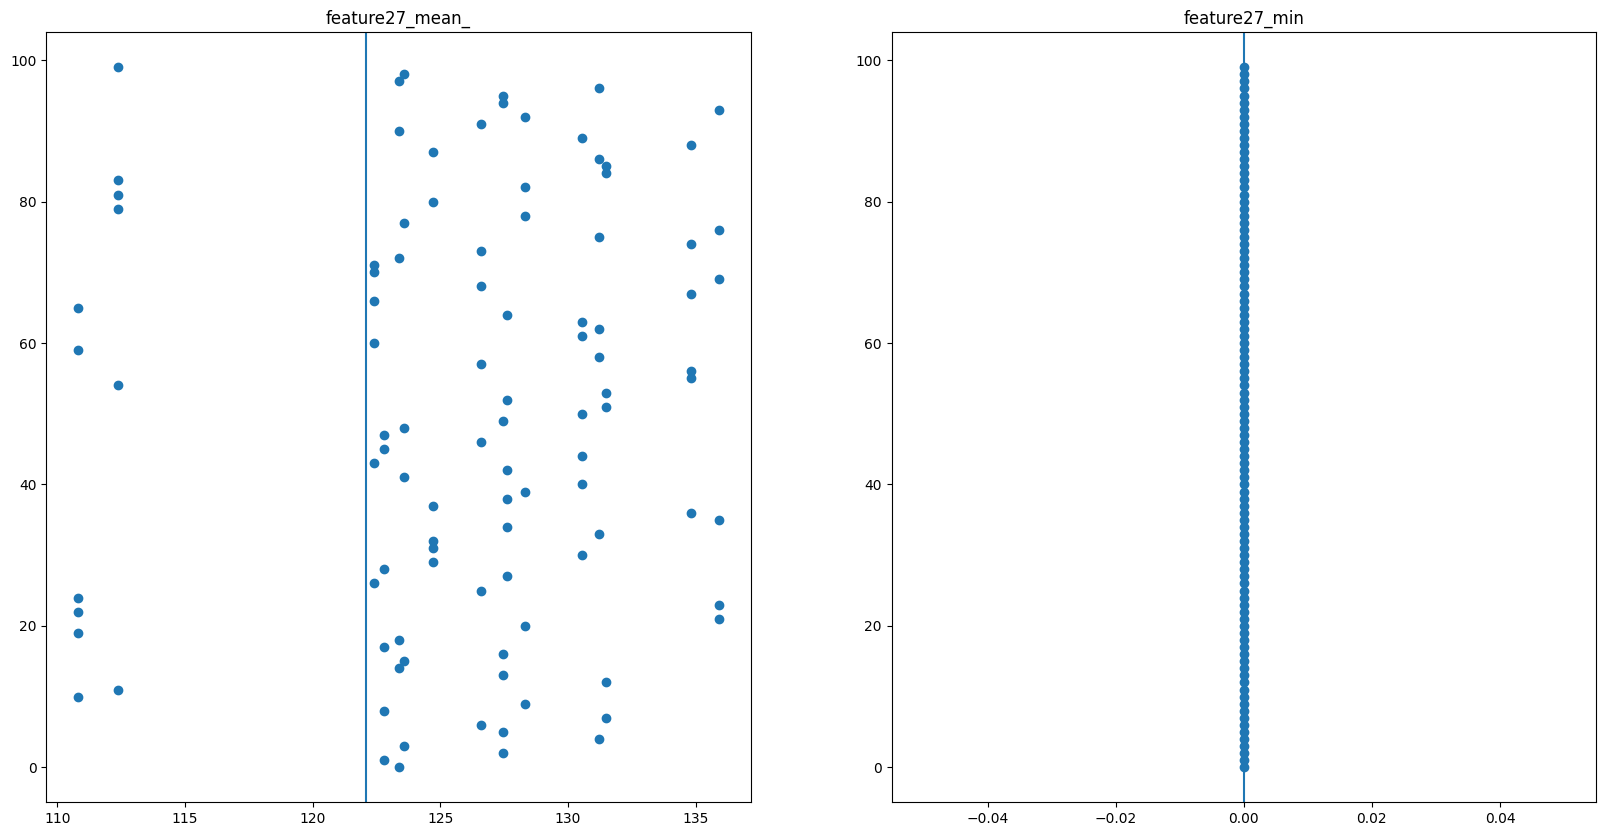

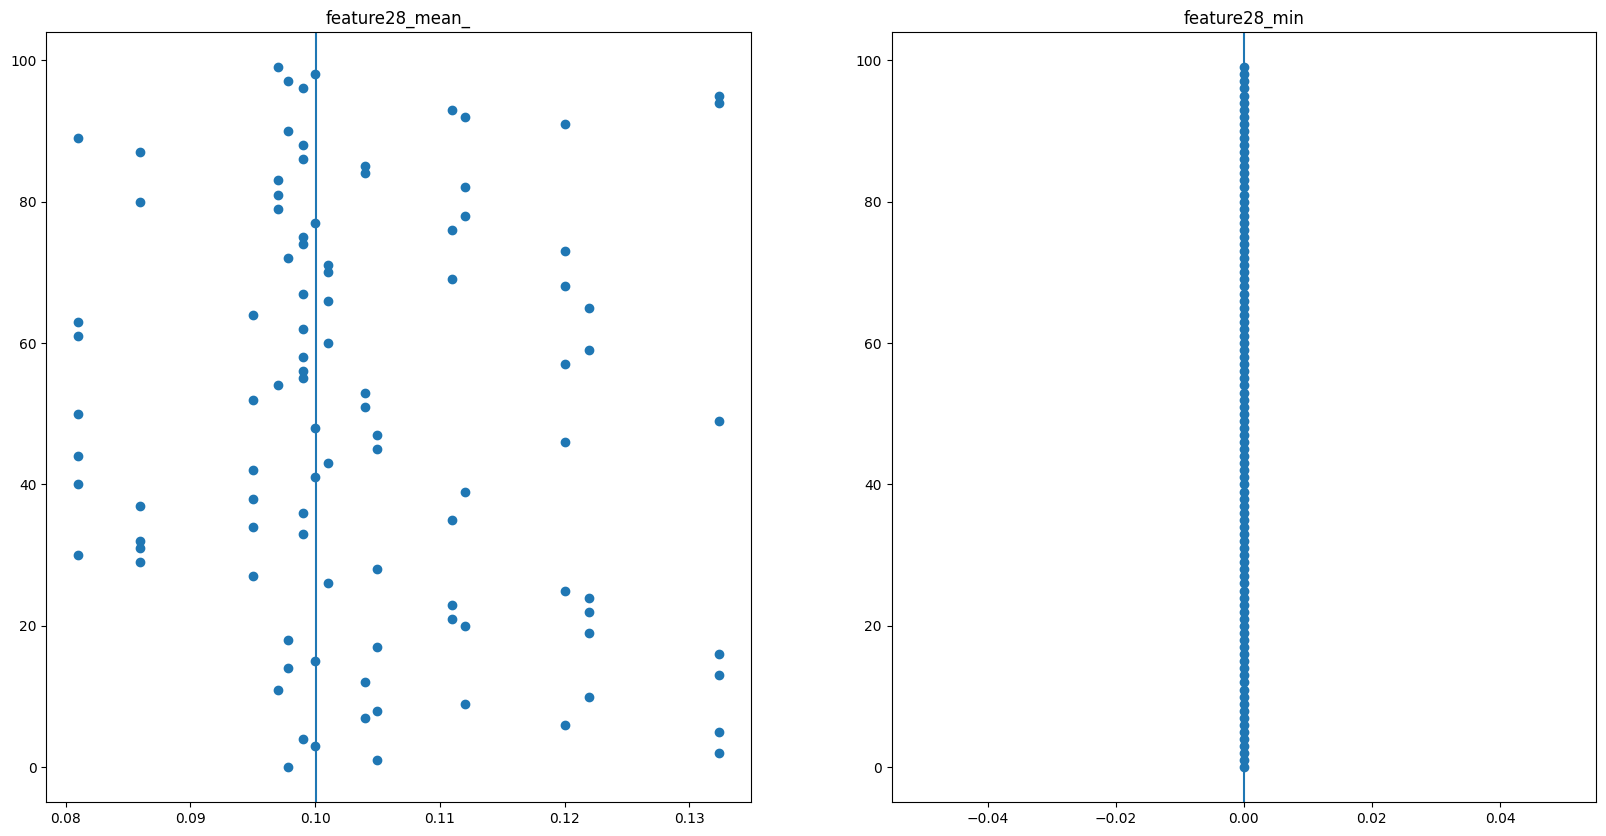

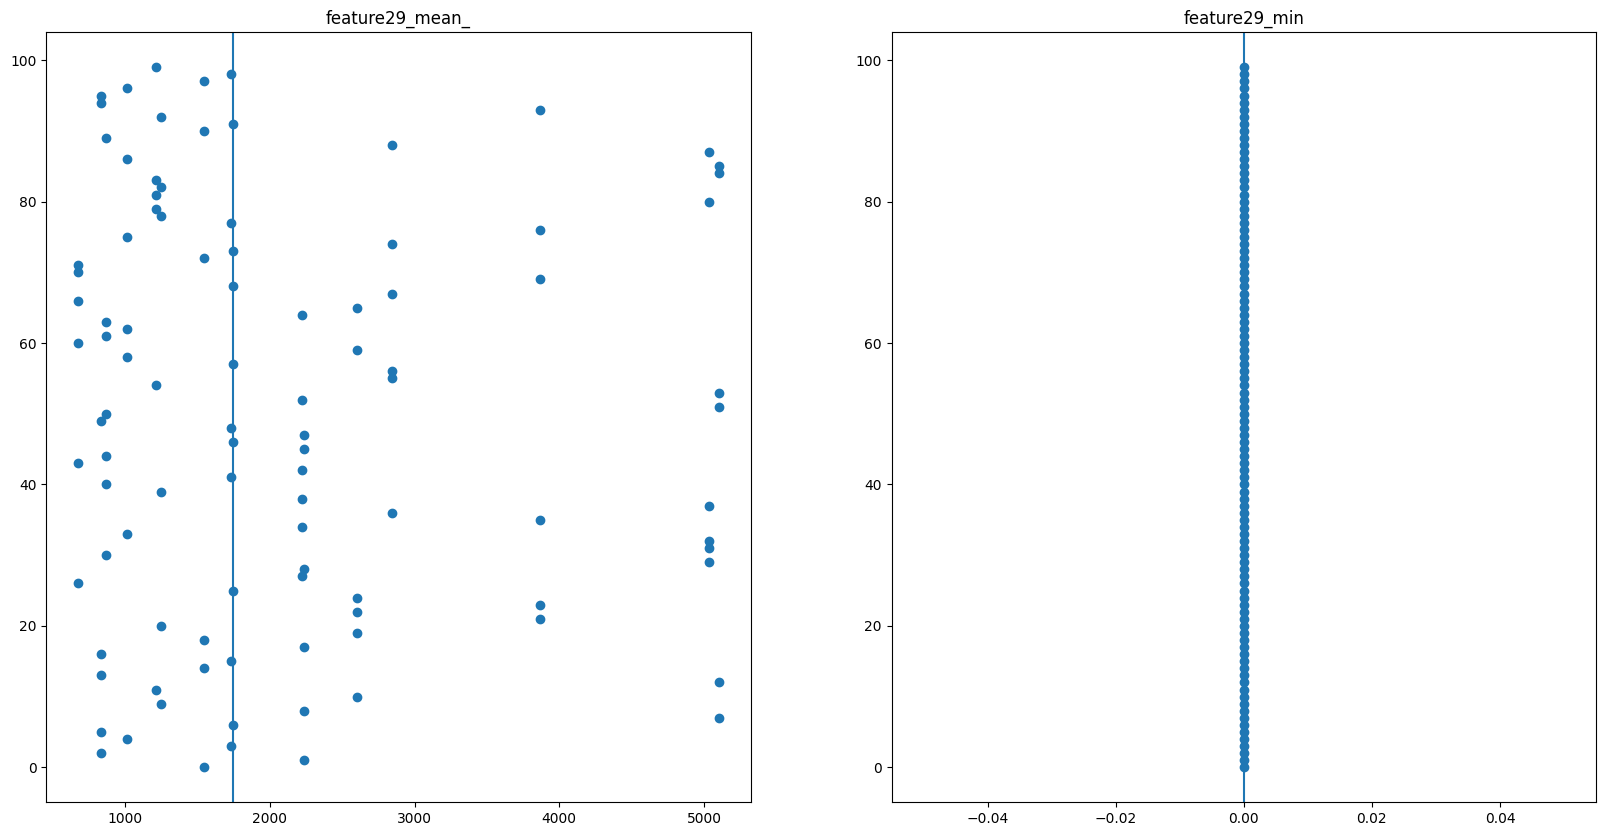

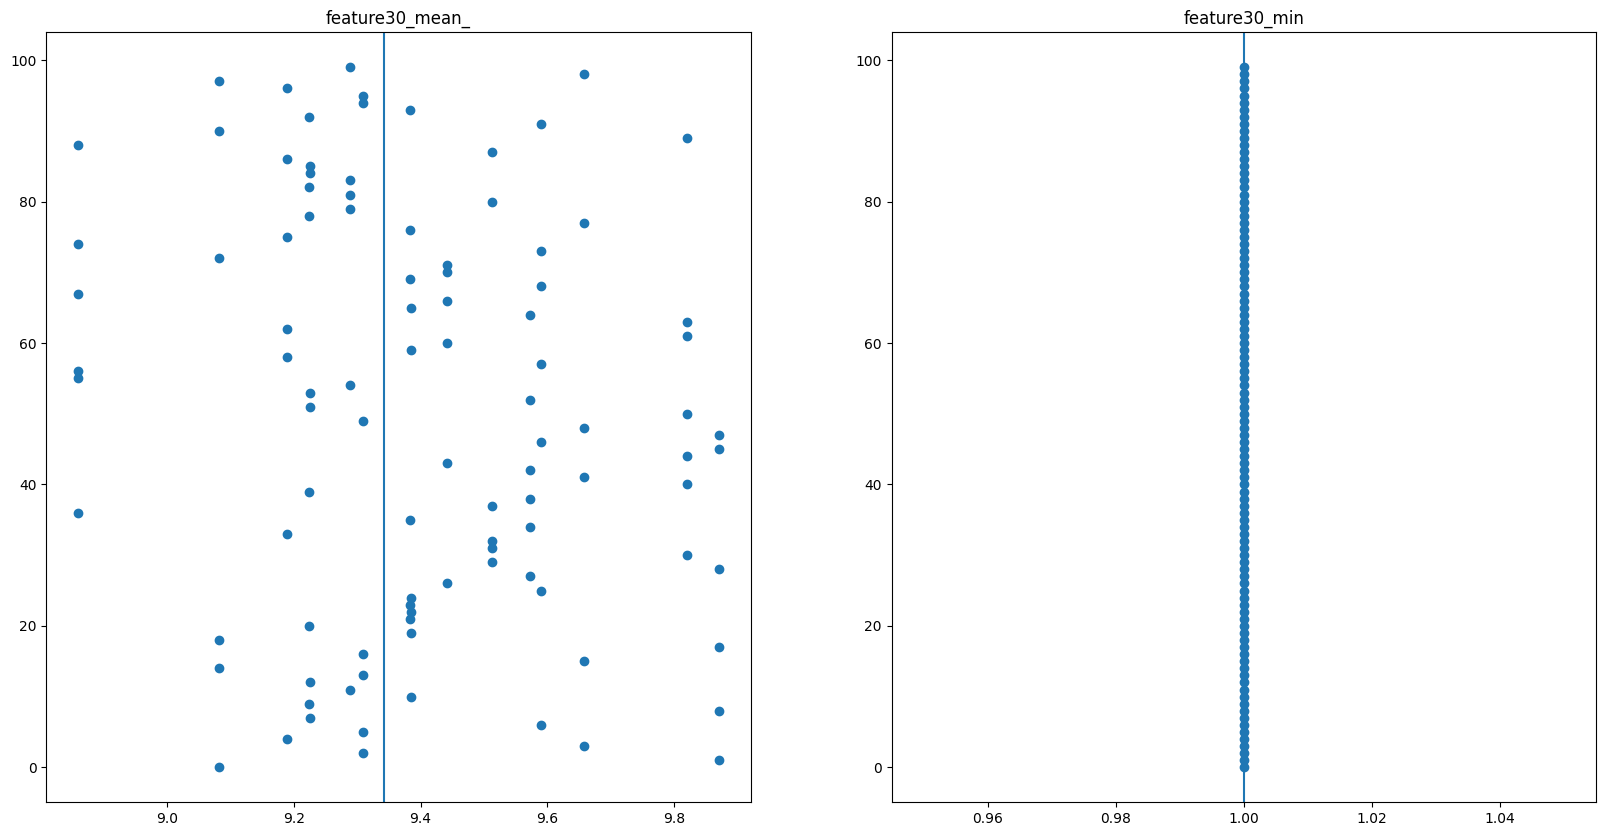

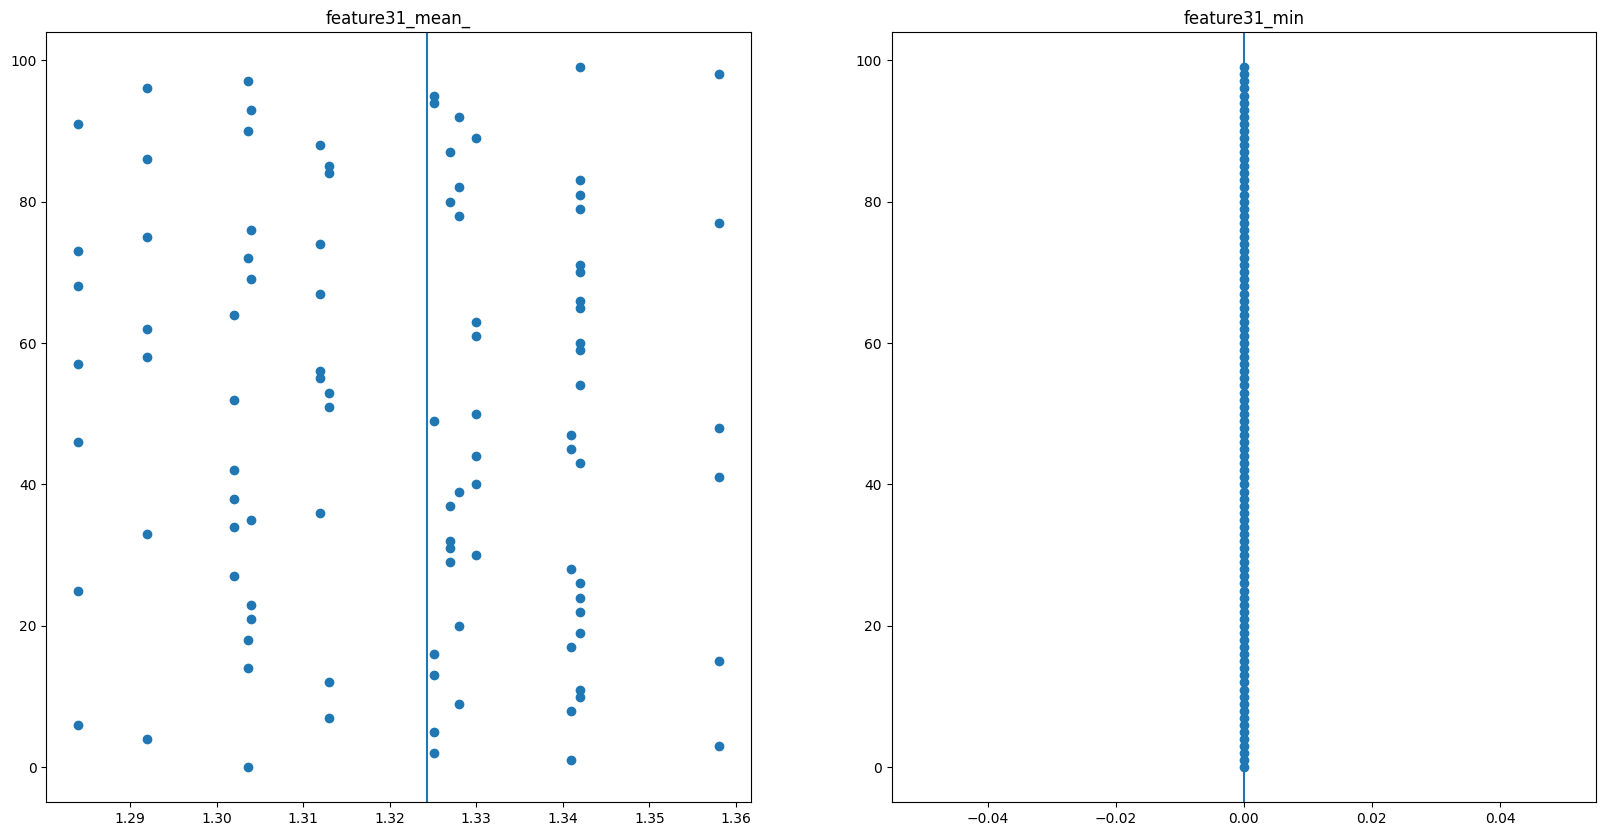

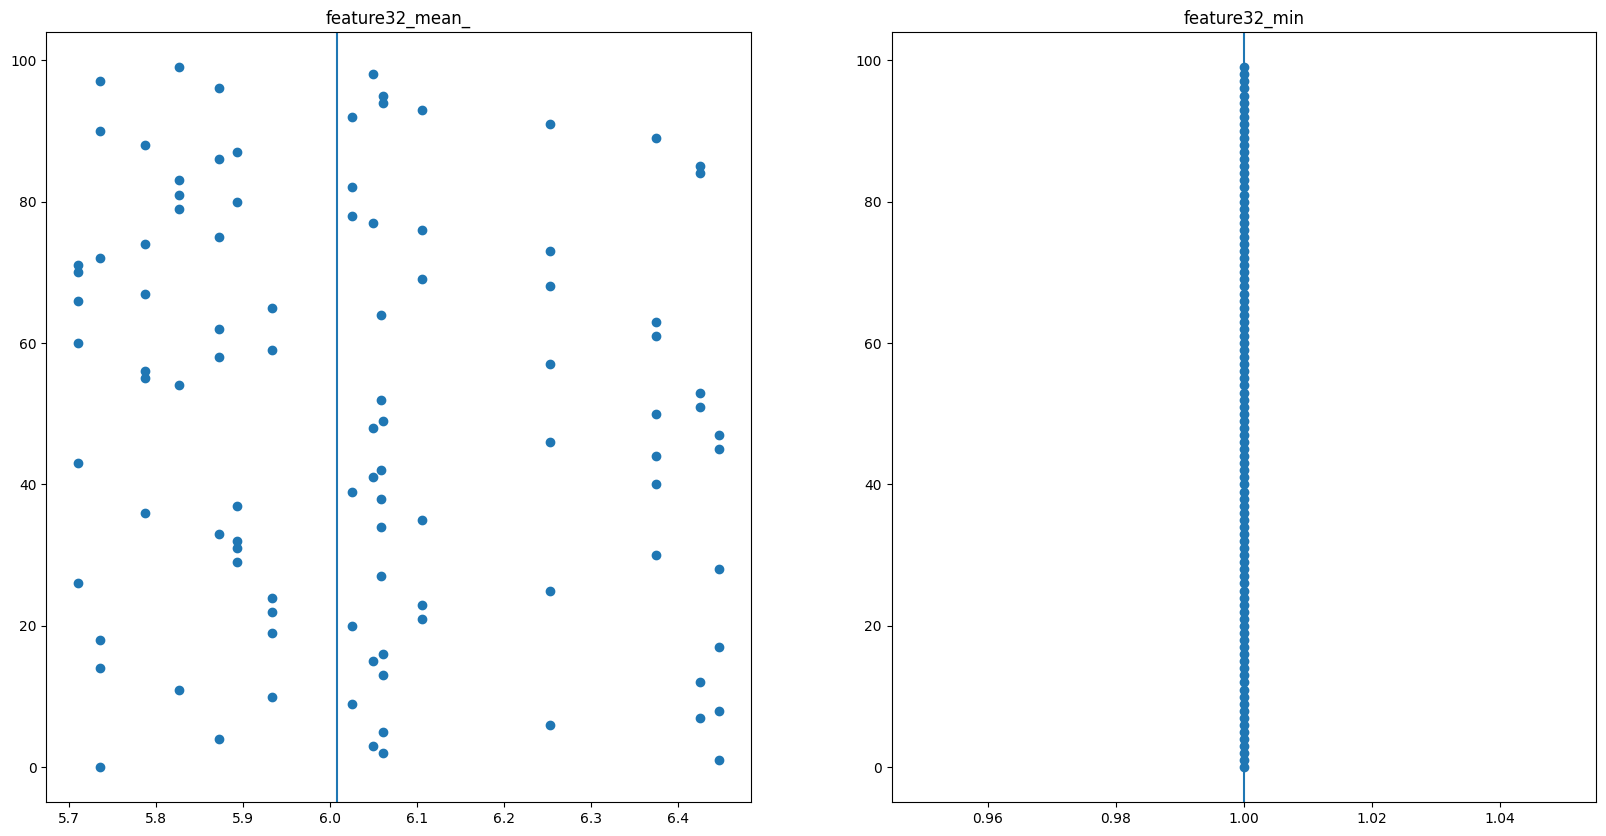

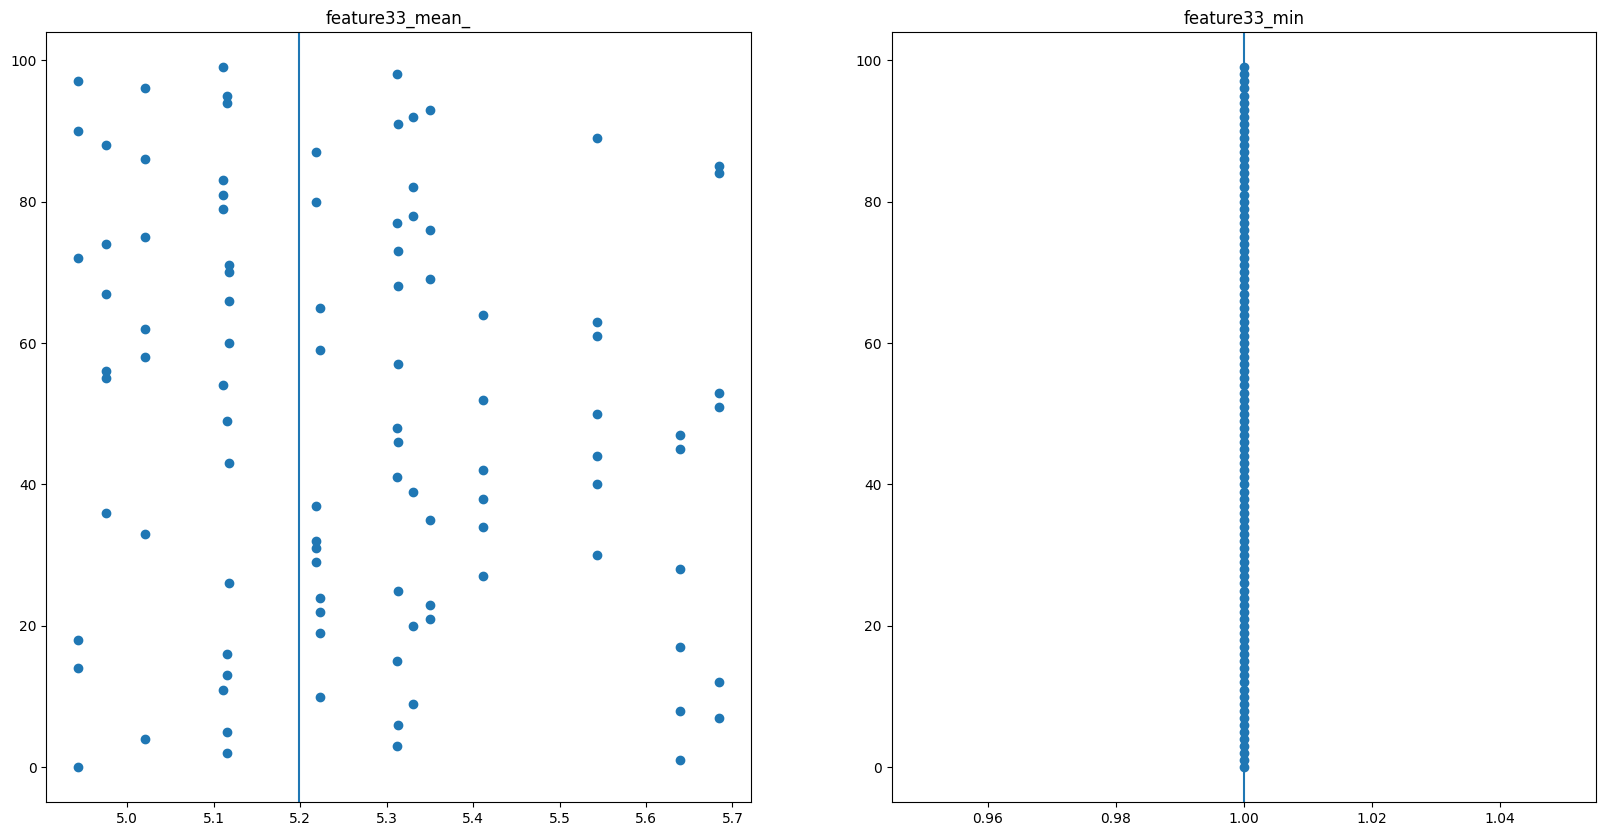

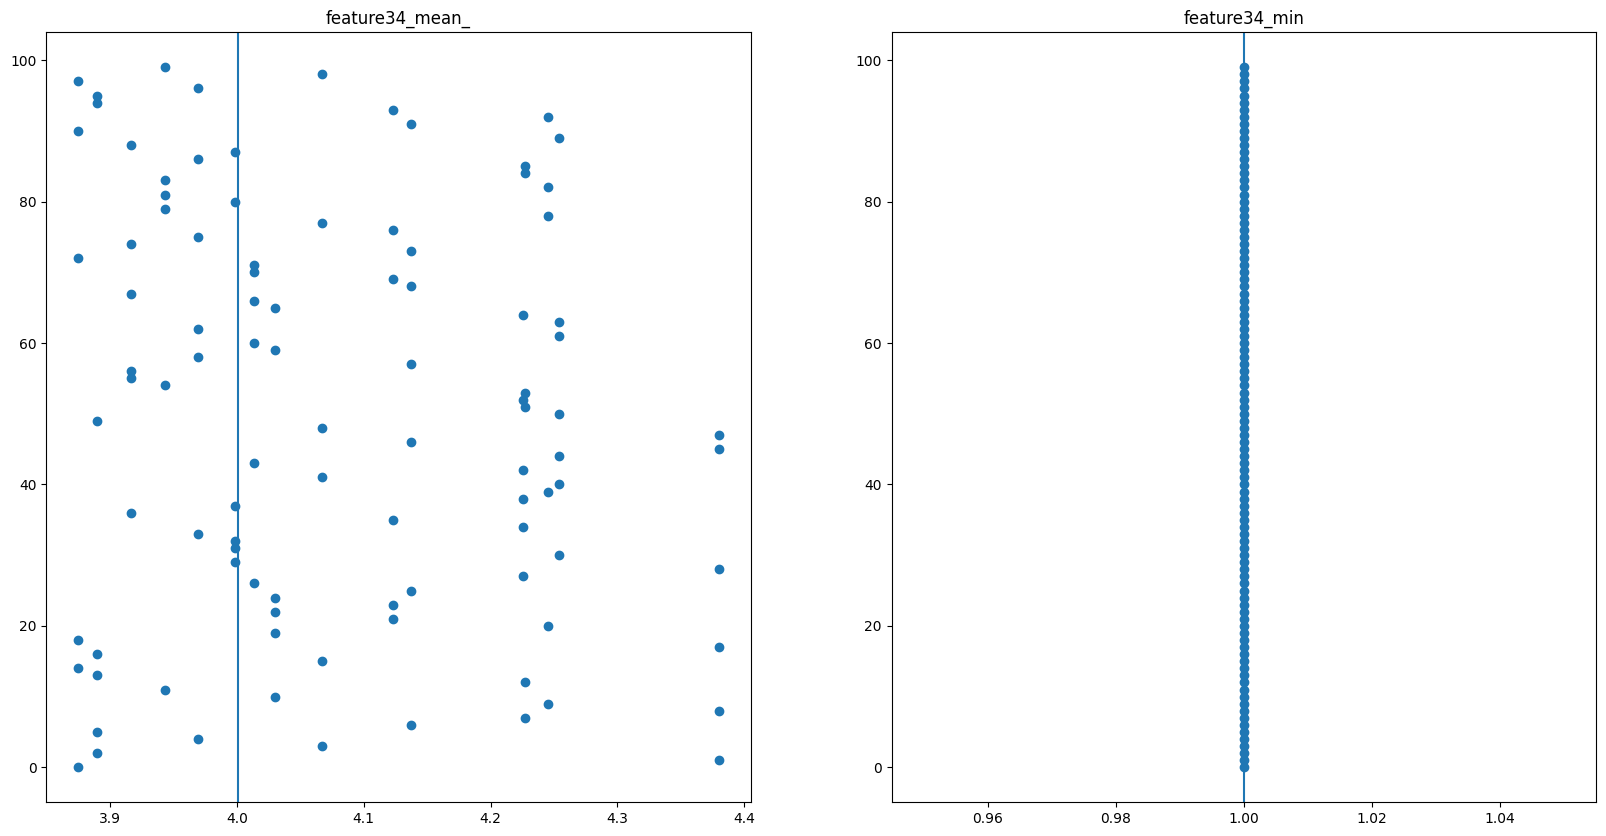

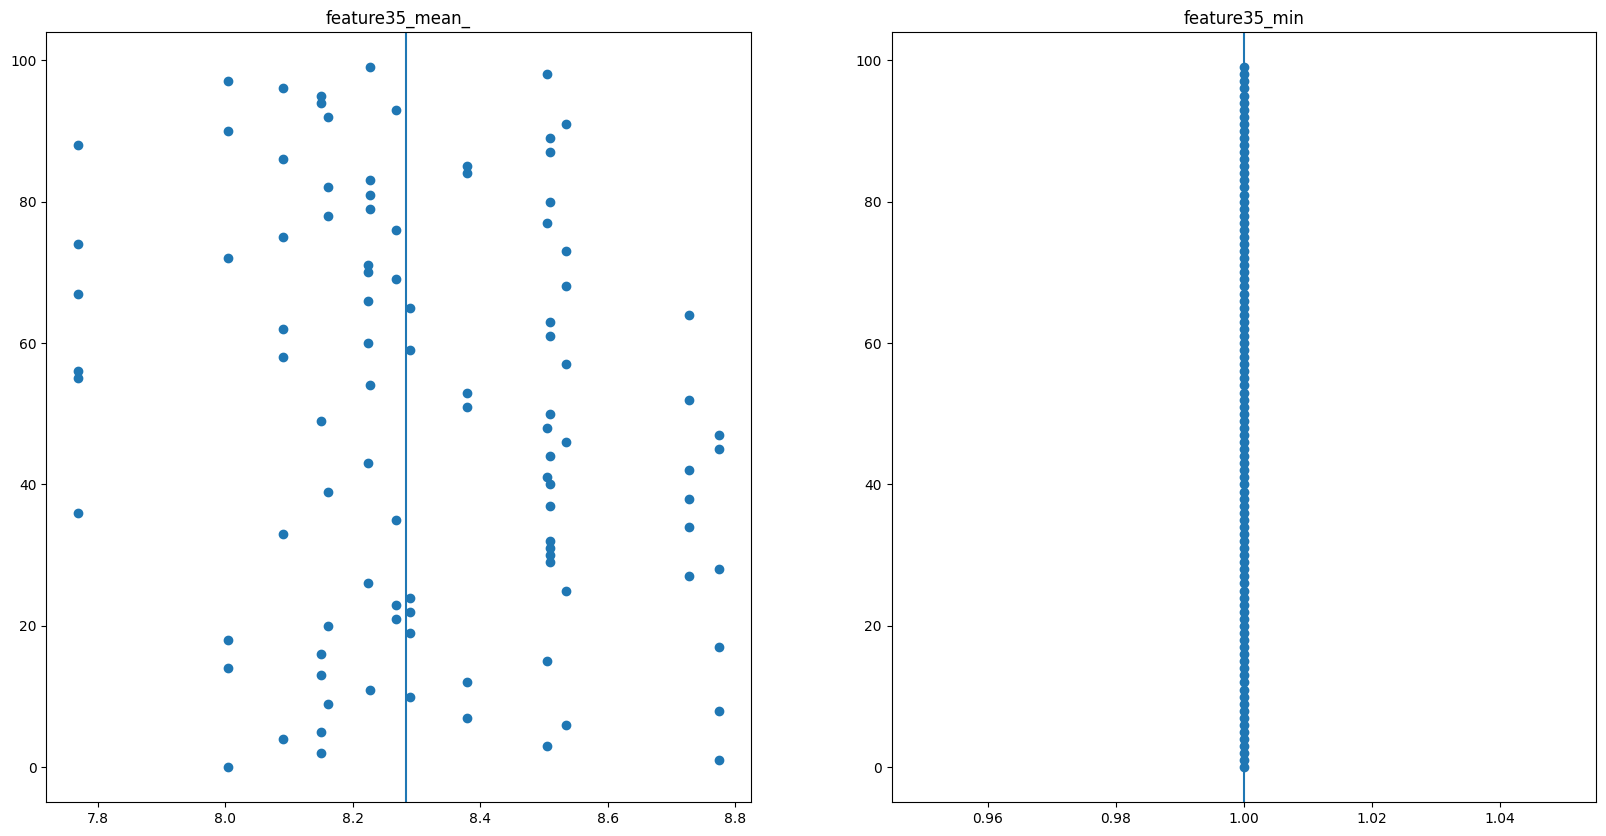

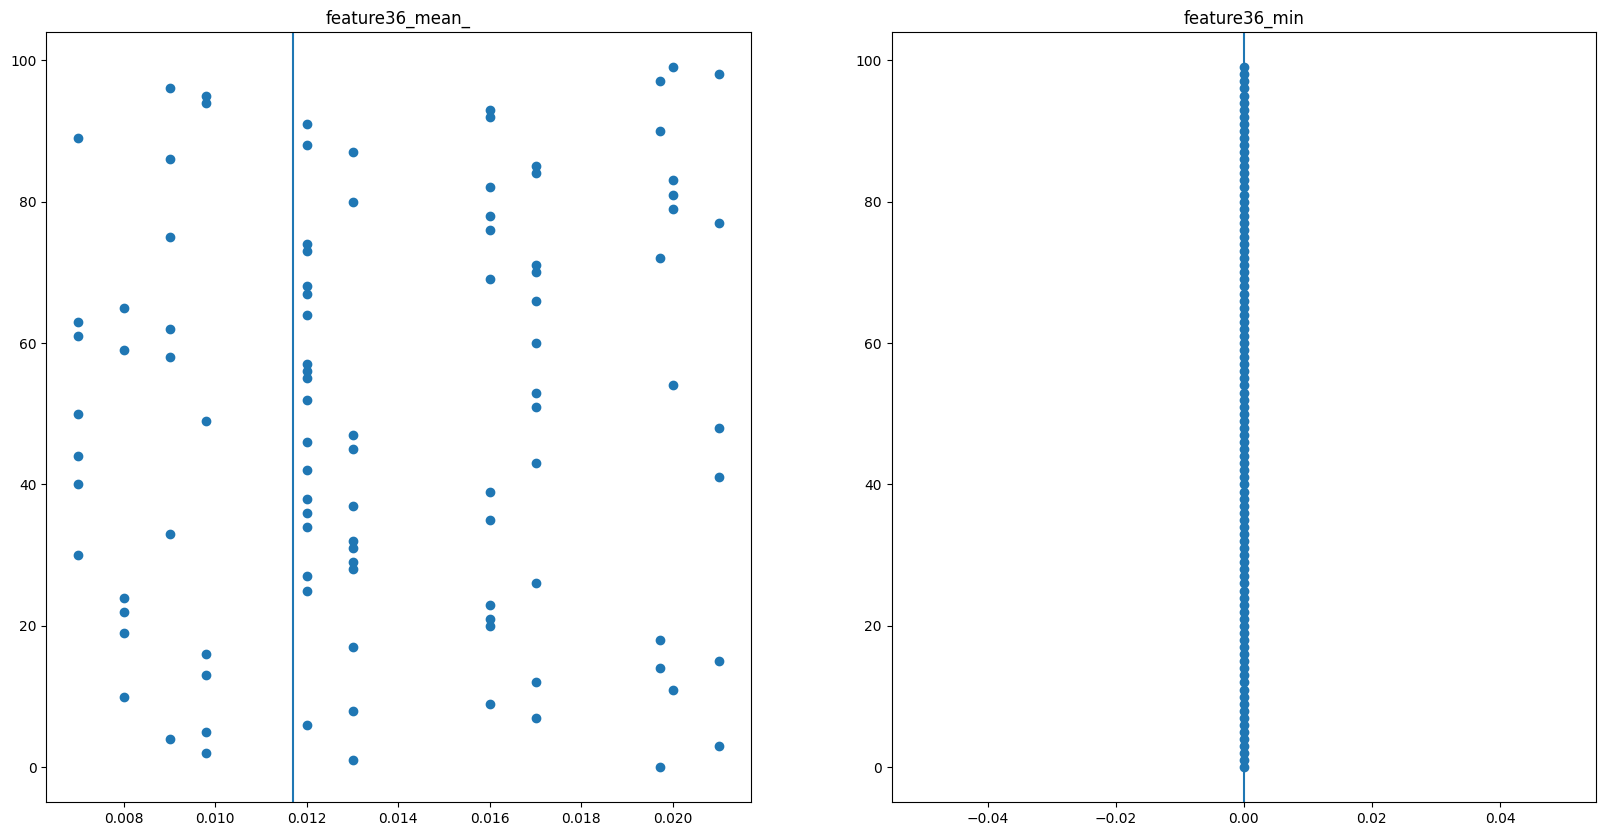

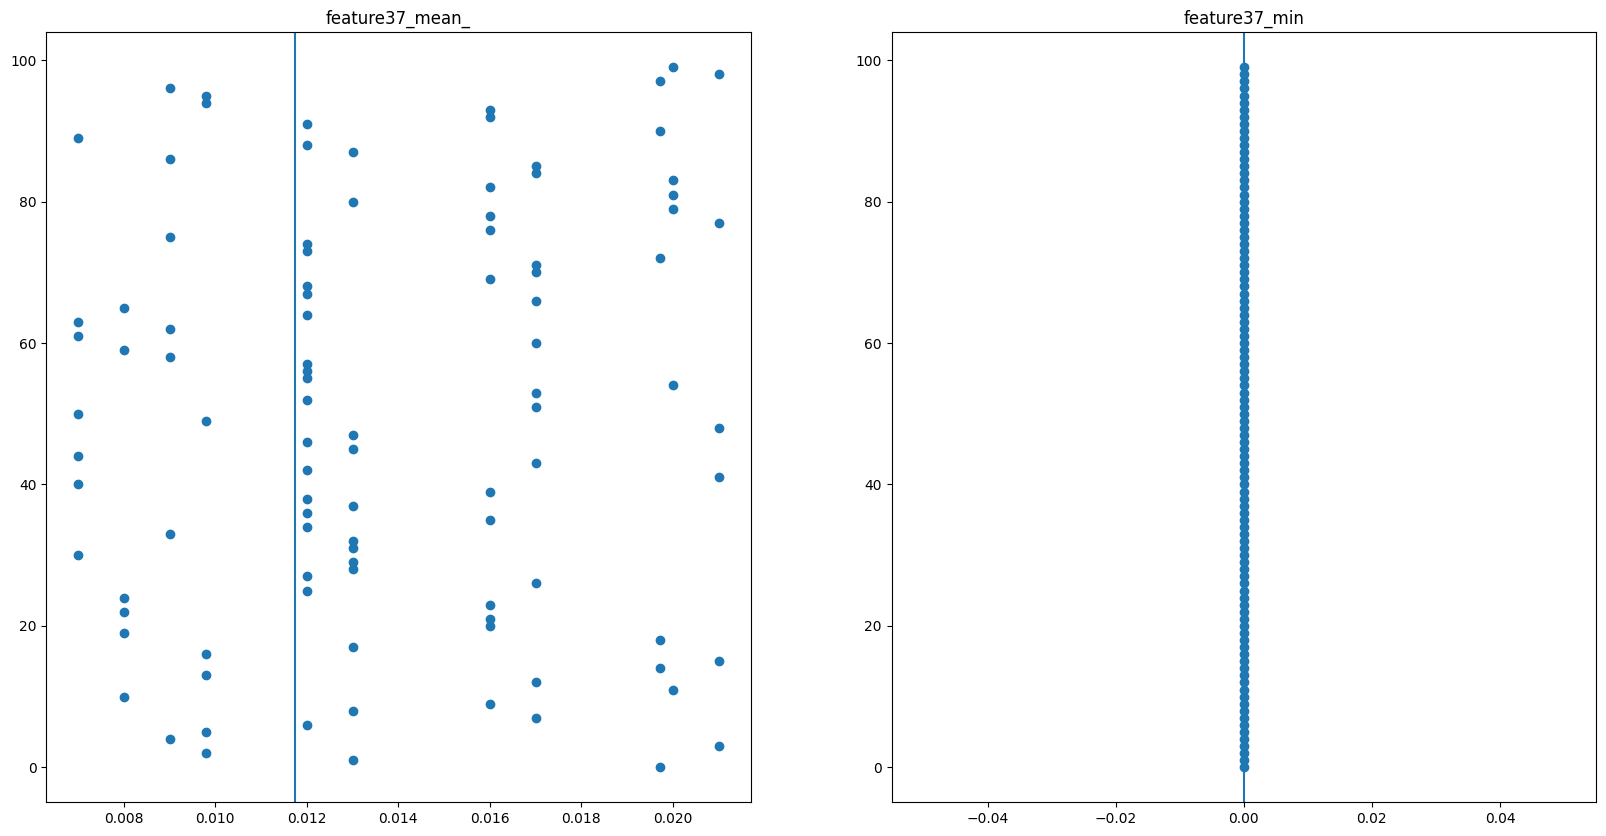

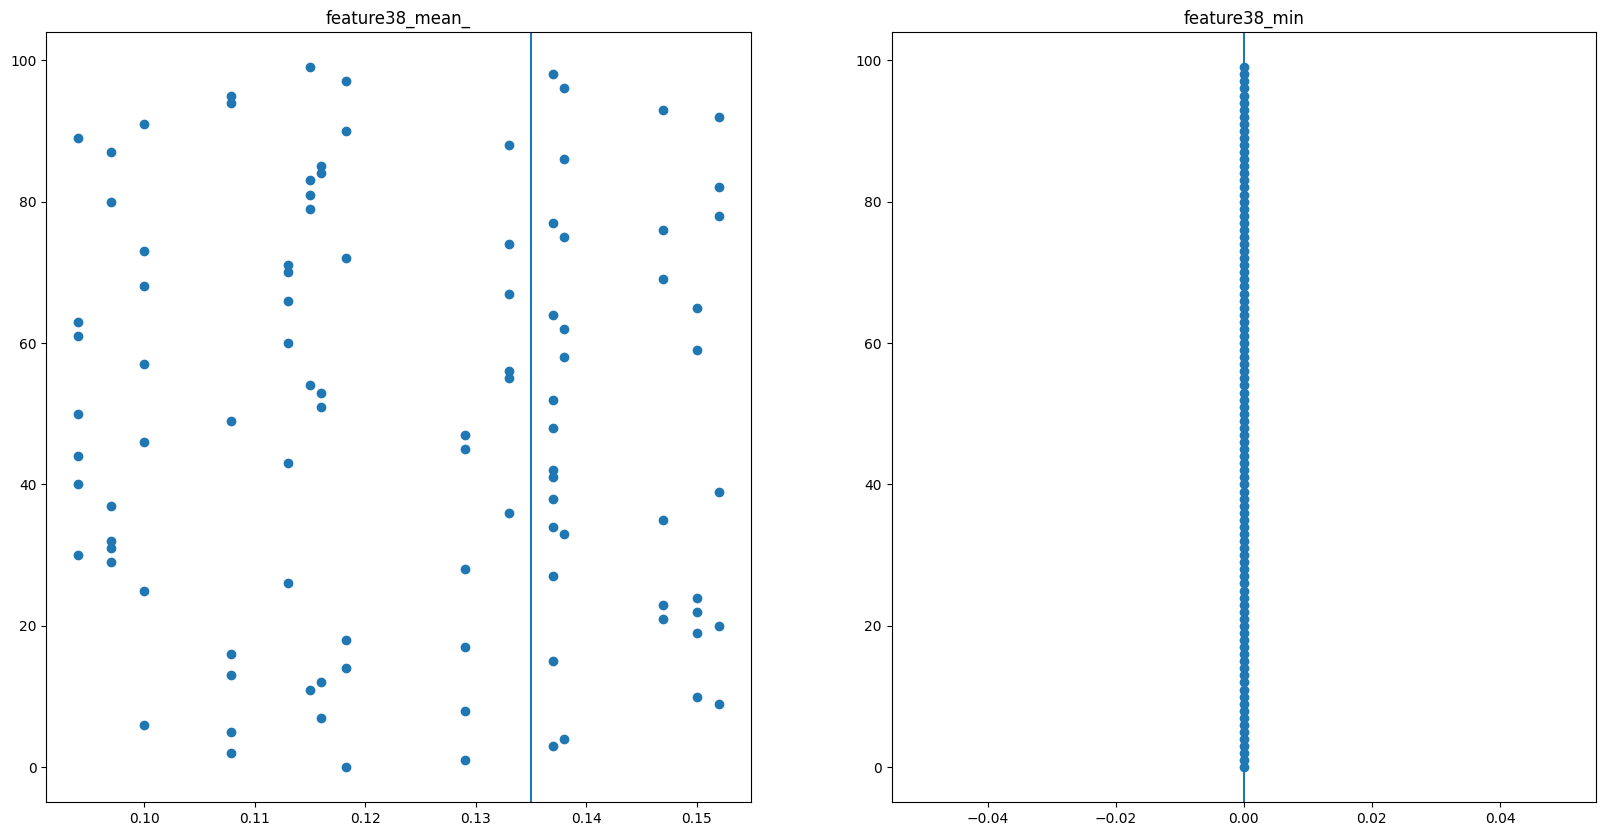

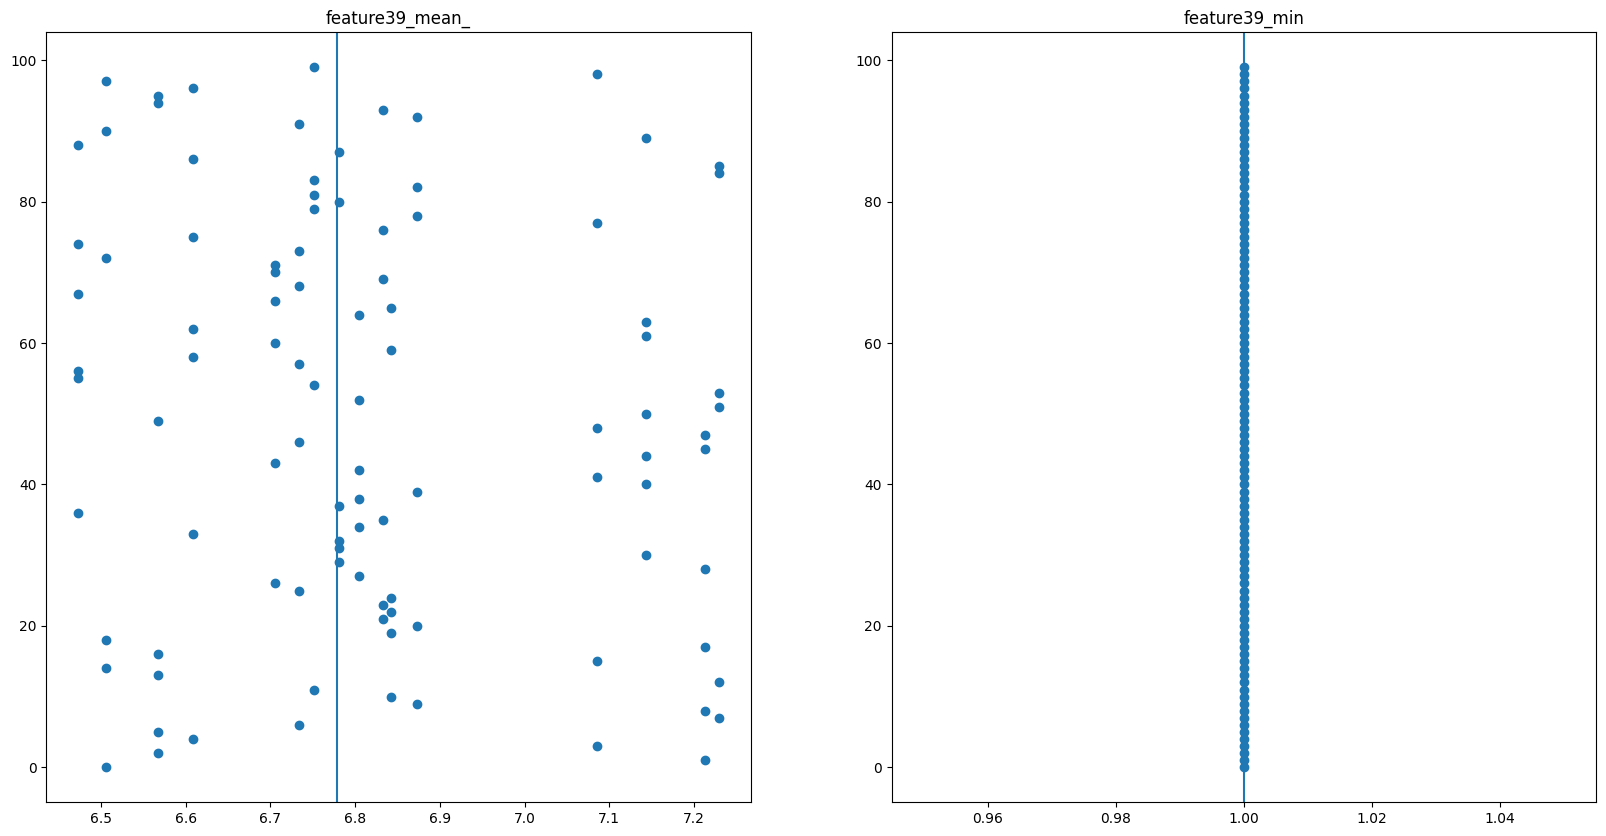

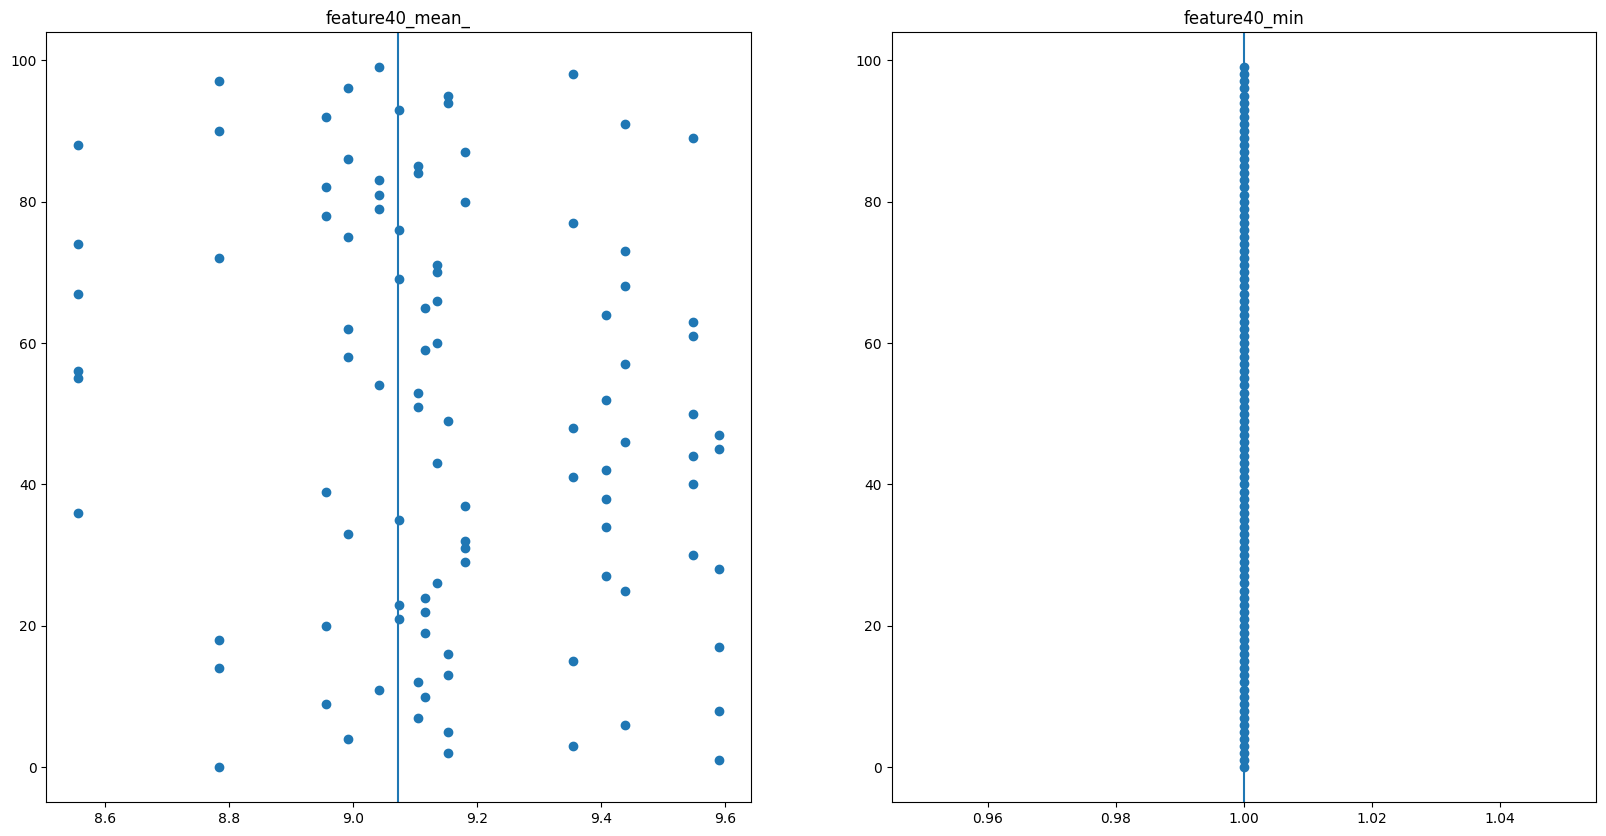

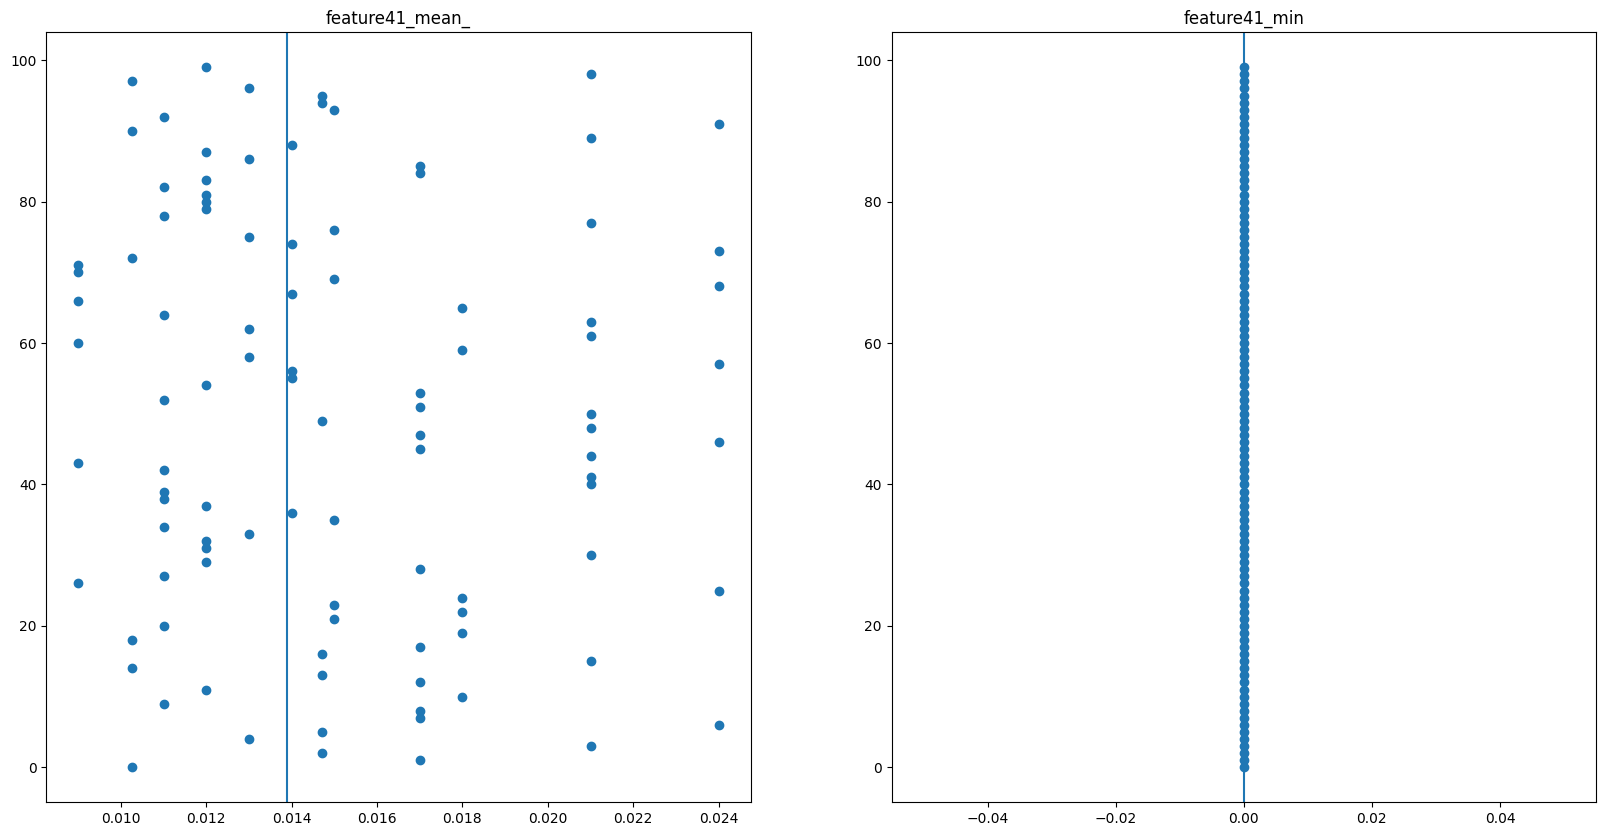

In [23]:
for col in check_drift.keys():
    stats = check_drift[col]
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
    ax1.scatter(x=stats['mean_'],y=stats.index)
    ax1.set_title(f'{col}_mean_')
    ax1.axvline(x=train_df[col].mean())

    ax2.scatter(x=stats['min_'],y=stats.index)
    ax2.set_title(f'{col}_min')
    ax2.axvline(x=train_df[col].min())
    plt.show()

In [18]:
check_drift['feature1']

,mean_,std_,max_,min_,n_max,n_min
0,1.221540,6.060007,59.935158,0.0,0,0
1,1.213154,5.737480,59.656837,0.0,0,0
2,1.400480,6.424497,59.999935,0.0,0,0
3,1.582170,6.957932,59.983475,0.0,0,0
4,1.628434,7.503111,59.993382,0.0,0,0
...,...,...,...,...,...,...
95,1.400480,6.424497,59.999935,0.0,0,0
96,1.628434,7.503111,59.993382,0.0,0,0
97,1.221540,6.060007,59.935158,0.0,0,0
98,1.582170,6.957932,59.983475,0.0,0,0


In [21]:
for col in check_drift.keys():
    stats = check_drift[col]
    print(stats.n_max.sum(), stats.n_min.sum())

12 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
12 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
14 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
